DATOS DE SENAMHI

In [24]:
# ============================
# 1. Importar librerías
# ============================
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# ============================
# 2. Cargar datos
# ============================
ruta = "C:/Users/mariosb/Desktop/TP2/datos_completos_Datos_tp2.csv"
df_total = pd.read_csv(ruta)

# ============================
# 3. Convertir columna Fecha a datetime
# ============================
df_total['Fecha'] = pd.to_datetime(df_total['Fecha'], errors='coerce')

# ============================
# 4. Eliminar columnas innecesarias
# ============================
columnas_a_eliminar = [
    'tmax','tmin','tmax_obs','tmin_obs',
    'Tmax_origen','Tmax_completo',
    'Tmin_origen','Tmin_completo',
    'pp_obs','pp','Pp_origen'
]

df_total = df_total.drop(columns=[c for c in columnas_a_eliminar if c in df_total.columns])

# ============================
# 5. Filtrar rango de fechas 1981-01-01 → 2014-12-31
# ============================
inicio = "1981-01-01"
fin = "2014-12-31"

df_total = df_total[(df_total['Fecha'] >= inicio) & (df_total['Fecha'] <= fin)]

# =============
# 6. Mostrar
# ==============
df_total


Unnamed: 0      Fecha  Pp_completo      Codigo      Nombre  Latitud  \
6271         6271 1981-01-01    28.437000  ho00000786    HUANCANE  -15.203   
6272         6272 1981-01-02    25.469635  ho00000786    HUANCANE  -15.203   
6273         6273 1981-01-03    39.571460  ho00000786    HUANCANE  -15.203   
6274         6274 1981-01-04    26.600588  ho00000786    HUANCANE  -15.203   
6275         6275 1981-01-05    30.673395  ho00000786    HUANCANE  -15.203   
...           ...        ...          ...         ...         ...      ...   
83761       83761 2014-12-27    24.366086  ho00000468  TINGOMARIA   -9.288   
83762       83762 2014-12-28    19.808241  ho00000468  TINGOMARIA   -9.288   
83763       83763 2014-12-29    28.207603  ho00000468  TINGOMARIA   -9.288   
83764       83764 2014-12-30     5.267039  ho00000468  TINGOMARIA   -9.288   
83765       83765 2014-12-31    17.047979  ho00000468  TINGOMARIA   -9.288   

       Longitud  Altitud (msnm)  
6271    -69.763            3860  
6272    -69.763            3860  
6273    -69.763            3860  
6274    -69.763            3860  
6275    -69.763            3860  
...         ...             ...  
83761   -76.000             645  
83762   -76.000             645  
83763   -76.000             645  
83764   -76.000             645  
83765   -76.000             645  

[49672 rows x 8 columns]

DATOS DE CHIRPS

In [25]:
# ============================
# 1. Importar librerías
# ============================
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# ============================
# 2. Cargar datos CHIRPS
# ============================
ruta_chirps = "C:/Users/mariosb/neuron/tm_todas_estaciones_diario.csv"
df_chirps = pd.read_csv(ruta_chirps)

# ============================
# 3. Renombrar columna de fecha
# ============================
df_chirps = df_chirps.rename(columns={"Unnamed: 0": "Fecha"})

# ============================
# 4. Convertir Fecha a datetime
# ============================
df_chirps["Fecha"] = pd.to_datetime(df_chirps["Fecha"], errors="coerce")

# ============================
# 5. Mostrar primeras filas
# ============================
df_chirps


Fecha  TingoMaria  Pucallpa   Huancane      Jauja
0     1981-01-01   12.534966  0.000000   0.000000   0.000000
1     1981-01-02   17.883217  9.627151   3.223782   3.448808
2     1981-01-03   16.211890  0.000000  24.694172   3.230779
3     1981-01-04    0.000000  0.000000   5.029100   2.675799
4     1981-01-05    4.800427  0.000000   1.225037   9.712159
...          ...         ...       ...        ...        ...
12413 2014-12-27   10.192053  0.000000   6.595047   5.937296
12414 2014-12-28   20.384106  0.000000   9.892570  11.874592
12415 2014-12-29   30.576159  0.000000   3.297524   0.000000
12416 2014-12-30    0.000000  0.000000   6.595047   0.000000
12417 2014-12-31    0.000000  0.000000   6.595047   5.937296

[12418 rows x 5 columns]

DATOS DE ERA5

In [36]:
# ============================
# 1. Importar librerías
# ============================
import pandas as pd

# ============================
# 2. Cargar archivos CSV de ERA5
# ============================
ruta_era5 = "C:/Users/mariosb/Desktop/TP2/ERA5/"

huan = pd.read_csv(ruta_era5 + "datos_huancane_exportados.csv")
jauj = pd.read_csv(ruta_era5 + "datos_jauja_exportados.csv")
puca = pd.read_csv(ruta_era5 + "datos_pucallpa_exportados.csv")
ting = pd.read_csv(ruta_era5 + "datos_tingo_exportados.csv")

# ============================
# 3. Agregar nombre de estación
# ============================
huan["Estacion"] = "Huancané"
jauj["Estacion"] = "Jauja"
puca["Estacion"] = "Pucallpa"
ting["Estacion"] = "Tingo María"

# ============================
# 4. Unir todo en un solo DataFrame
# ============================
df_ERA5 = pd.concat([huan, jauj, puca, ting], ignore_index=True)

# ============================
# 5. Convertir la columna de fecha (si existe)
# ============================
if "time" in df_ERA5.columns:
    df_ERA5["time"] = pd.to_datetime(df_ERA5["time"], errors="coerce")
elif "Fecha" in df_ERA5.columns:
    df_ERA5["Fecha"] = pd.to_datetime(df_ERA5["Fecha"], errors="coerce")

# ============================
# 6. Mostrar primeras filas
# ============================
df_ERA5

valid_time  latitude  longitude        tp  number  expver  \
0      1981-01-01 06:00:00     -14.0     -70.00  0.016043       0       1   
1      1981-01-01 06:00:00     -14.0     -69.75  0.020937       0       1   
2      1981-01-01 06:00:00     -14.0     -69.50  0.016573       0       1   
3      1981-01-01 06:00:00     -14.0     -69.25  0.015993       0       1   
4      1981-01-01 06:00:00     -14.0     -69.00  0.013798       0       1   
...                    ...       ...        ...       ...     ...     ...   
48955  2014-12-01 06:00:00     -10.0     -77.00  0.008152       0       1   
48956  2014-12-01 06:00:00     -10.0     -76.75  0.008249       0       1   
48957  2014-12-01 06:00:00     -10.0     -76.50  0.006603       0       1   
48958  2014-12-01 06:00:00     -10.0     -76.25  0.005154       0       1   
48959  2014-12-01 06:00:00     -10.0     -76.00  0.008175       0       1   

          Estacion  
0         Huancané  
1         Huancané  
2         Huancané  
3         Huancané  
4         Huancané  
...            ...  
48955  Tingo María  
48956  Tingo María  
48957  Tingo María  
48958  Tingo María  
48959  Tingo María  

[48960 rows x 7 columns]

MENSUALIZANDO LOS DATOS DE PRECIPITACIÓN

In [43]:
# ============================
# 1) CHIRPS → Series mensuales
# ============================
tm_ch = df_chirps["TingoMaria"].resample("M").sum()
tm_ch = pd.Series(tm_ch.values, index=tm_ch.index)

pu_ch = df_chirps["Pucallpa"].resample("M").sum()
pu_ch = pd.Series(pu_ch.values, index=pu_ch.index)

hu_ch = df_chirps["Huancane"].resample("M").sum()
hu_ch = pd.Series(hu_ch.values, index=hu_ch.index)

ja_ch = df_chirps["Jauja"].resample("M").sum()
ja_ch = pd.Series(ja_ch.values, index=ja_ch.index)



# ============================
# 2) SENAMHI → Series mensuales
# ============================
df_total["Fecha"] = pd.to_datetime(df_total["Fecha"])

def senamhi_mensual(nombre_estacion):
    df_est = df_total[df_total["Nombre"] == nombre_estacion]
    serie = df_est.set_index("Fecha")["Pp_completo"].resample("M").sum()
    return serie

hu_se = senamhi_mensual("HUANCANE")
ja_se = senamhi_mensual("JAUJA")
pu_se = senamhi_mensual("PUCALLPA")
tm_se = senamhi_mensual("TINGOMARIA")


# ============================
# 3) ERA5 → Series mensuales
# ============================
df_ERA5["valid_time"] = pd.to_datetime(df_ERA5["valid_time"])

# Convertir de metros a milímetros
df_ERA5["tp_mm"] = df_ERA5["tp"] * 1000

# Precipitación diaria por estación
era_diario = df_ERA5.groupby(["Estacion", "valid_time"])["tp_mm"].sum().reset_index()

# Resample mensual por estación
era_mensual = (
    era_diario
    .set_index("valid_time")
    .groupby("Estacion")["tp_mm"]
    .resample("M").sum()
    .reset_index()
)

def era5_mensual(nombre_estacion):
    df_est = era_mensual[era_mensual["Estacion"] == nombre_estacion]
    return df_est.set_index("valid_time")["tp_mm"]

hu_er = era5_mensual("Huancané")
ja_er = era5_mensual("Jauja")
pu_er = era5_mensual("Pucallpa")
tm_er = era5_mensual("Tingo María")


C:\Users\mariosb\AppData\Local\Temp\ipykernel_15104\497046326.py:4: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  tm_ch = df_chirps["TingoMaria"].resample("M").sum()
C:\Users\mariosb\AppData\Local\Temp\ipykernel_15104\497046326.py:7: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  pu_ch = df_chirps["Pucallpa"].resample("M").sum()
C:\Users\mariosb\AppData\Local\Temp\ipykernel_15104\497046326.py:10: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  hu_ch = df_chirps["Huancane"].resample("M").sum()
C:\Users\mariosb\AppData\Local\Temp\ipykernel_15104\497046326.py:13: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  ja_ch = df_chirps["Jauja"].resample("M").sum()
C:\Users\mariosb\AppData\Local\Temp\ipykernel_15104\497046326.py:25: FutureWarning: 'M' is deprecated and will be removed i

In [44]:
# ============================
# UNIFICAR SERIES POR ESTACIÓN
# ============================

# --- HUANCANÉ ---
hu = pd.concat([hu_ch, hu_se, hu_er], axis=1)
hu.columns = ["CHIRPS", "SENAMHI", "ERA5"]
hu = hu.replace(0, np.nan).dropna()

# --- JAUJA ---
ja = pd.concat([ja_ch, ja_se, ja_er], axis=1)
ja.columns = ["CHIRPS", "SENAMHI", "ERA5"]
ja = ja.replace(0, np.nan).dropna()

# --- PUCALLPA ---
pu = pd.concat([pu_ch, pu_se, pu_er], axis=1)
pu.columns = ["CHIRPS", "SENAMHI", "ERA5"]
pu = pu.replace(0, np.nan).dropna()

# --- TINGO MARÍA ---
tm = pd.concat([tm_ch, tm_se, tm_er], axis=1)
tm.columns = ["CHIRPS", "SENAMHI", "ERA5"]
tm = tm.replace(0, np.nan).dropna()


MATRIZ DE CORRELACIÓN

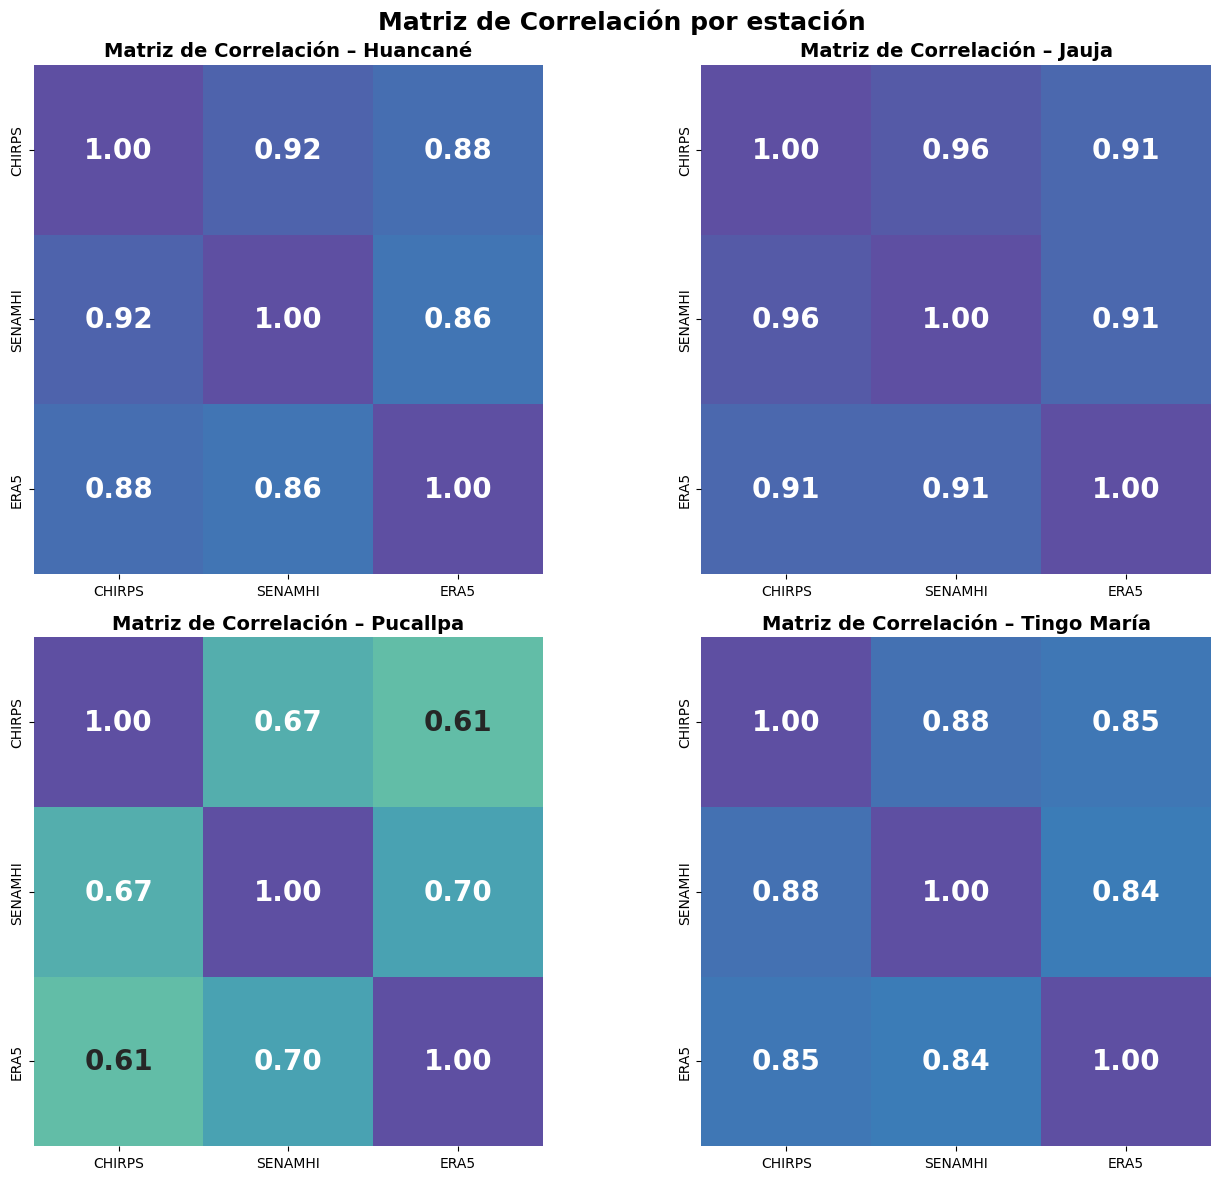

In [45]:
# ============================
# 1. Importar librerías
# ============================
import seaborn as sns
import matplotlib.pyplot as plt

# ============================
# 2. Crear figura 2x2
# ============================
fig, axes = plt.subplots(2, 2, figsize=(14, 12))

# ============================
# 3. Lista de datasets por estación
# ============================
datasets = [
    ("Huancané", hu, axes[0, 0]),
    ("Jauja", ja, axes[0, 1]),
    ("Pucallpa", pu, axes[1, 0]),
    ("Tingo María", tm, axes[1, 1])
]

# ============================
# 4. Dibujar cada heatmap
# ============================
for name, df, ax in datasets:

    corr = df.corr()

    sns.heatmap(
        corr,
        annot=True,
        fmt=".2f",
        cmap="Spectral",
        vmin=-1,
        vmax=1,
        square=True,
        cbar=False,
        ax=ax,
        annot_kws={"size": 20, "weight": "bold"}  # Tamaño y negrita
    )

    ax.set_title(
        f"Matriz de Correlación – {name}",
        fontsize=14,
        fontweight="bold"
    )

# ============================
# 5. Ajustes finales
# ============================
plt.suptitle(
    "Matriz de Correlación por estación",
    fontsize=18,
    fontweight="bold"
)

plt.tight_layout()
plt.show()


BOXPLOTS E HISTOGRAMAS

Guardado: figuras_precipitacion\boxplots_CHIRPS.png


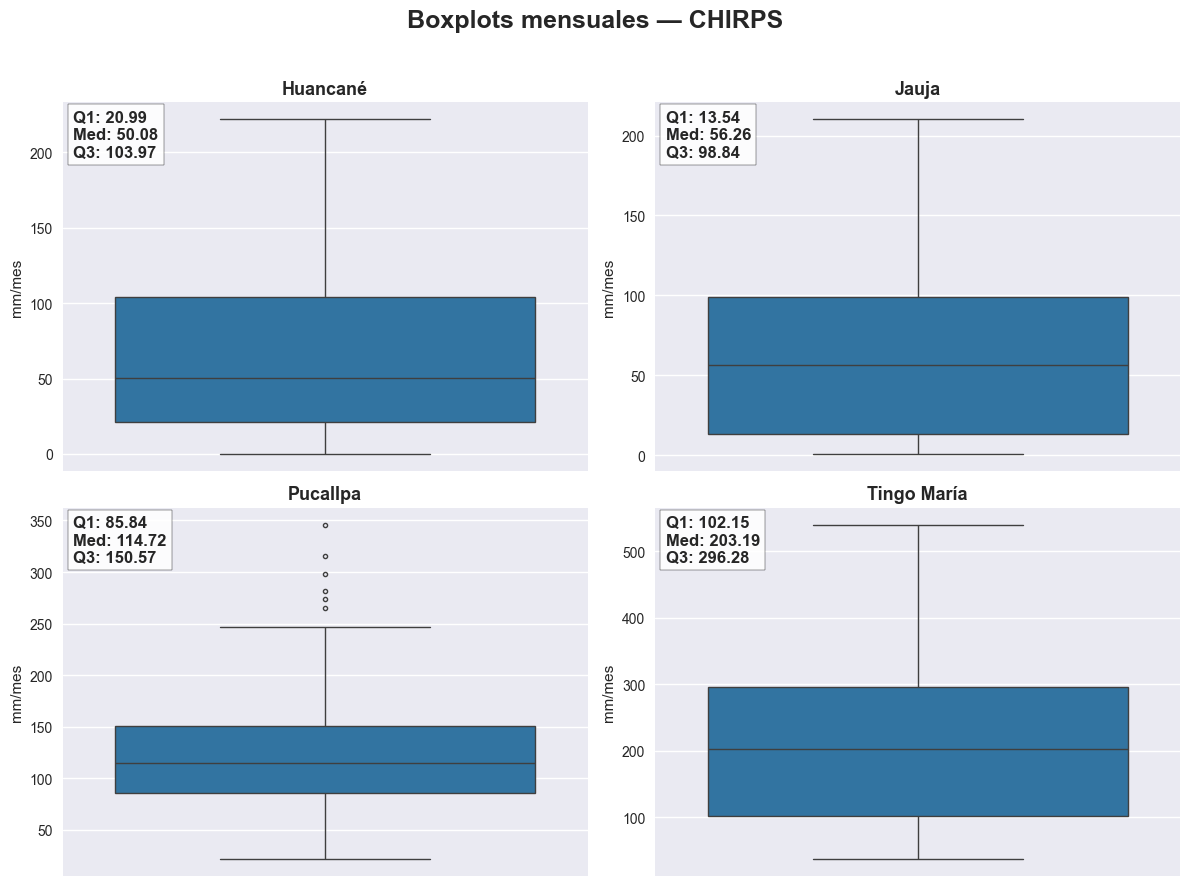

Guardado: figuras_precipitacion\hist_CHIRPS.png


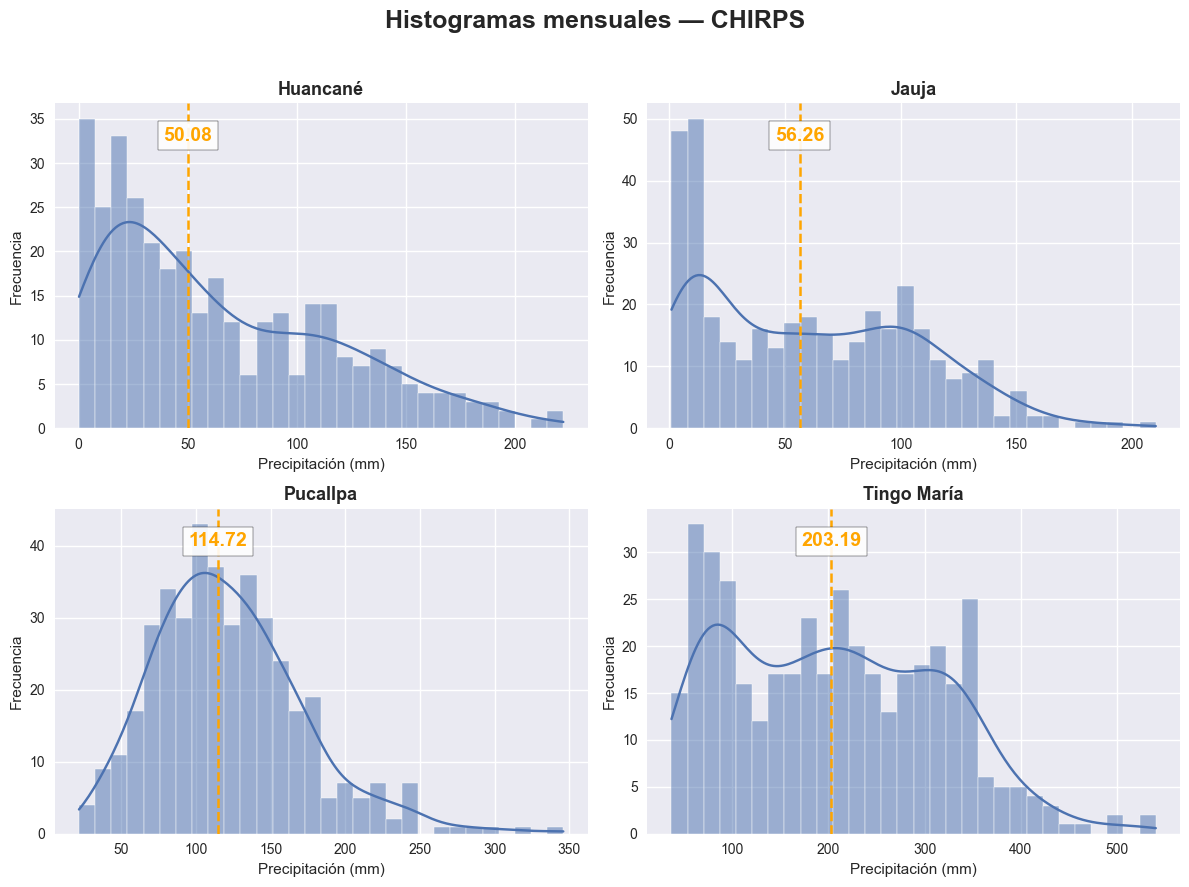

Guardado: figuras_precipitacion\boxplots_SENAMHI.png


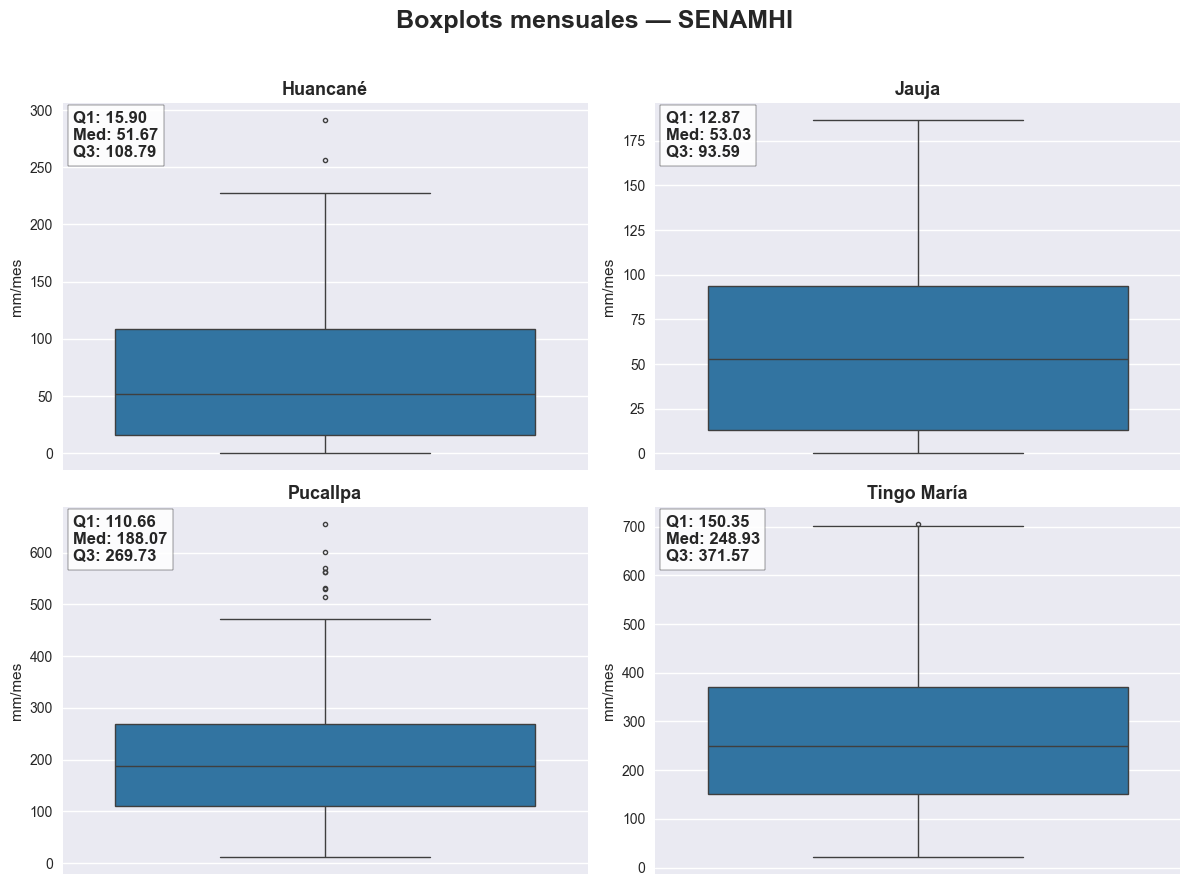

Guardado: figuras_precipitacion\hist_SENAMHI.png


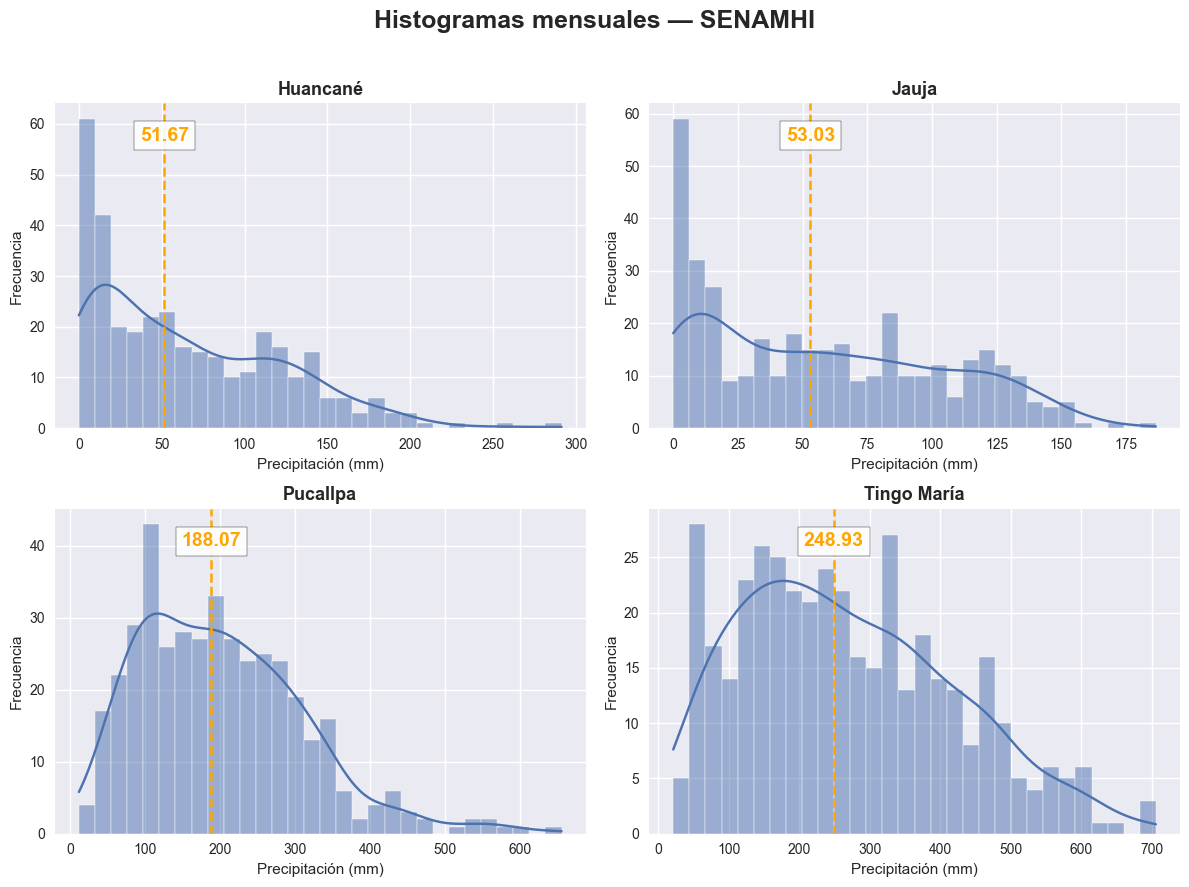

Guardado: figuras_precipitacion\boxplots_ERA5.png


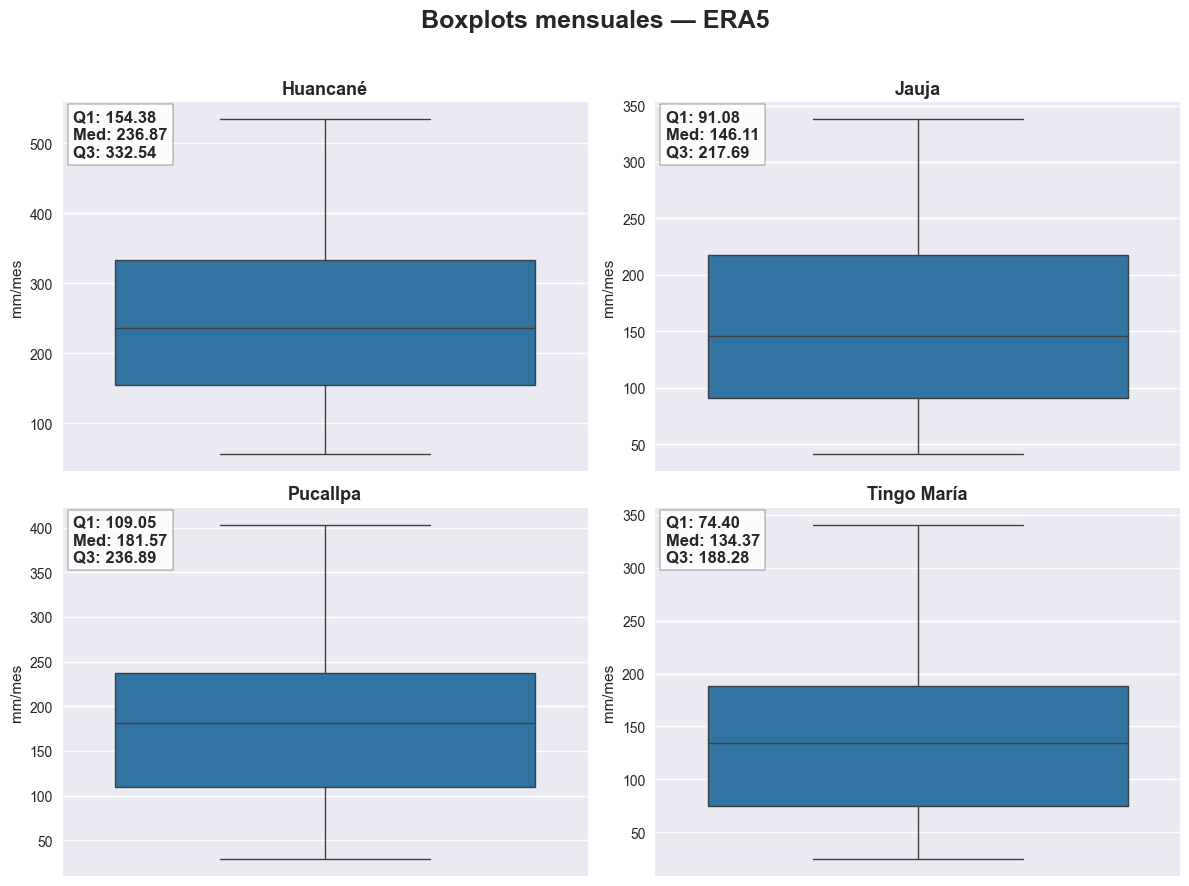

Guardado: figuras_precipitacion\hist_ERA5.png


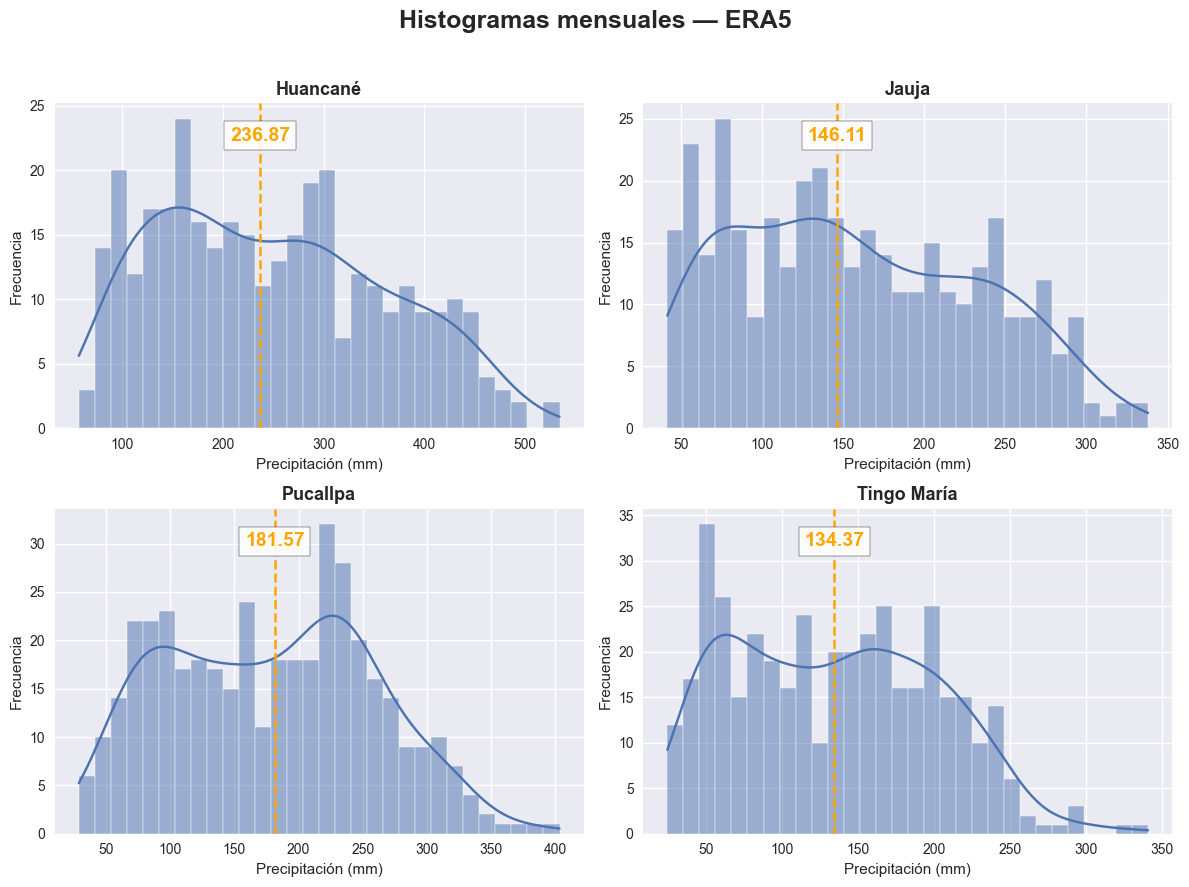

In [48]:
# ============================
# 1. Importar librerías
# ============================
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import os

sns.set_style("darkgrid")

# ============================
# 2. Diccionario de estaciones
# ============================
# hu, ja, pu, tm deben existir antes de este bloque
stations_df = {
    "Huancané": hu,
    "Jauja": ja,
    "Pucallpa": pu,
    "Tingo María": tm
}

# Columnas a analizar
columns = ["CHIRPS", "SENAMHI", "ERA5"]

# Carpeta para exportar figuras
outdir = "figuras_precipitacion"
os.makedirs(outdir, exist_ok=True)

# ============================
# 3. Función: Figura Boxplots
# ============================
def make_boxplot_figure(dataset_col, stations_df, save=True):

    fig, axes = plt.subplots(2, 2, figsize=(12, 9))
    axes = axes.flatten()

    color_box = "#1f77b4"

    for ax, (est_name, df) in zip(axes, stations_df.items()):

        if dataset_col not in df.columns:
            ax.text(0.5, 0.5, f"No existe columna\n'{dataset_col}'",
                    ha="center", va="center")
            ax.set_axis_off()
            continue

        serie = df[dataset_col].dropna().values

        if serie.size == 0:
            ax.text(0.5, 0.5, "Serie vacía", ha="center", va="center")
            ax.set_axis_off()
            continue

        sns.boxplot(y=serie, ax=ax, color=color_box, fliersize=3)

        # Cuartiles
        q1, q2, q3 = np.nanpercentile(serie, [25, 50, 75])
        stats_txt = f"Q1: {q1:.2f}\nMed: {q2:.2f}\nQ3: {q3:.2f}"

        # Texto más grande y visible
        ax.text(0.02, 0.98, stats_txt,
                transform=ax.transAxes,
                fontsize=12, fontweight="bold",
                va="top",
                bbox=dict(facecolor="white", alpha=0.9, edgecolor="black"))

        ax.set_title(est_name, fontsize=13, fontweight="bold")
        ax.set_ylabel("mm/mes")
        ax.set_xticks([])

    fig.suptitle(f"Boxplots mensuales — {dataset_col}", fontsize=18, fontweight="bold")
    fig.tight_layout(rect=[0, 0, 1, 0.96])

    if save:
        fname = os.path.join(outdir, f"boxplots_{dataset_col}.png")
        fig.savefig(fname, dpi=300)
        print(f"Guardado: {fname}")

    plt.show()
    plt.close(fig)

# ============================
# 4. Función: Figura Histogramas
# ============================
def make_hist_figure(dataset_col, stations_df, save=True, bins=30):

    fig, axes = plt.subplots(2, 2, figsize=(12, 9))
    axes = axes.flatten()

    for ax, (est_name, df) in zip(axes, stations_df.items()):

        if dataset_col not in df.columns:
            ax.text(0.5, 0.5, f"No existe columna\n'{dataset_col}'",
                    ha="center", va="center")
            ax.set_axis_off()
            continue

        data = df[dataset_col].dropna().values

        if data.size == 0:
            ax.text(0.5, 0.5, "Serie vacía", ha="center", va="center")
            ax.set_axis_off()
            continue

        median = np.nanmedian(data)

        sns.histplot(data, kde=True, ax=ax, bins=bins)

        # Línea de la mediana
        ax.axvline(median, color="orange", linestyle="--", linewidth=1.8)

        # Texto grande con fondo
        ymax = ax.get_ylim()[1]
        ax.text(median, ymax * 0.9, f"{median:.2f}",
                color="orange",
                ha="center", va="center",
                fontsize=14, fontweight="bold",
                bbox=dict(facecolor="white", alpha=0.9, edgecolor="black"))

        ax.set_title(est_name, fontsize=13, fontweight="bold")
        ax.set_xlabel("Precipitación (mm)")
        ax.set_ylabel("Frecuencia")

    fig.suptitle(f"Histogramas mensuales — {dataset_col}", fontsize=18, fontweight="bold")
    fig.tight_layout(rect=[0, 0, 1, 0.96])

    if save:
        fname = os.path.join(outdir, f"hist_{dataset_col}.png")
        fig.savefig(fname, dpi=300)
        print(f"Guardado: {fname}")

    plt.show()
    plt.close(fig)

# ============================
# 5. Ejecutar para CHIRPS, SENAMHI y ERA5
# ============================
for col in columns:
    make_boxplot_figure(col, stations_df, save=True)
    make_hist_figure(col, stations_df, save=True)


SERIES MENSUALES


=== Generando figuras para CHIRPS ===



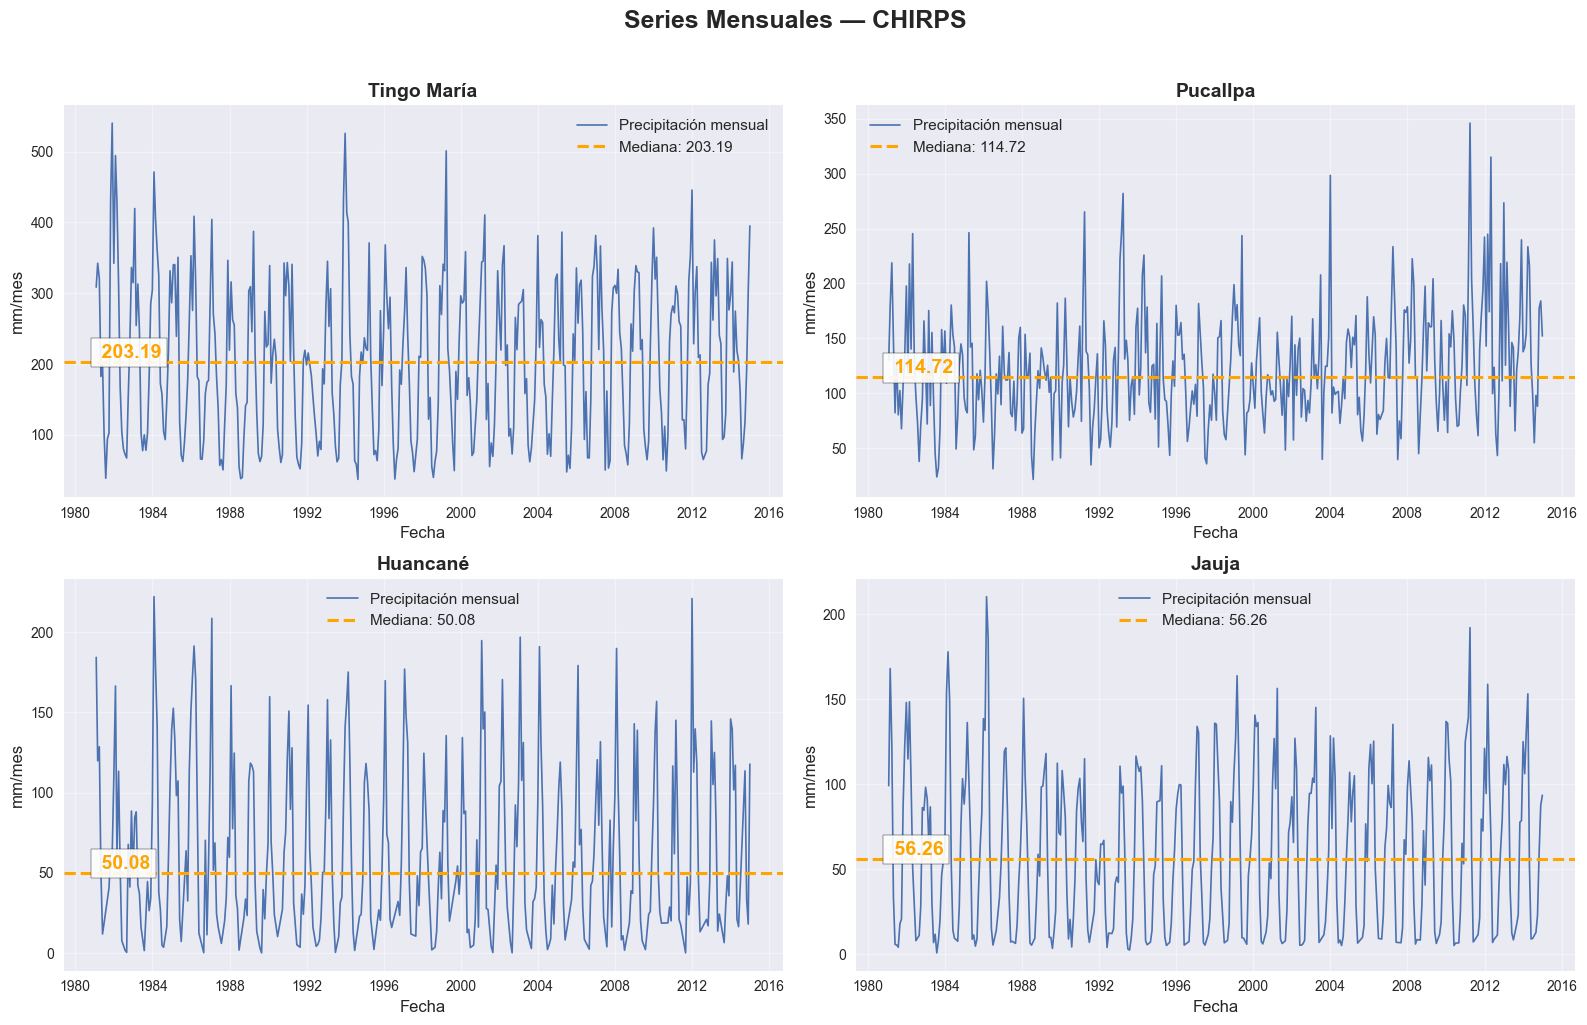


=== Generando figuras para SENAMHI ===



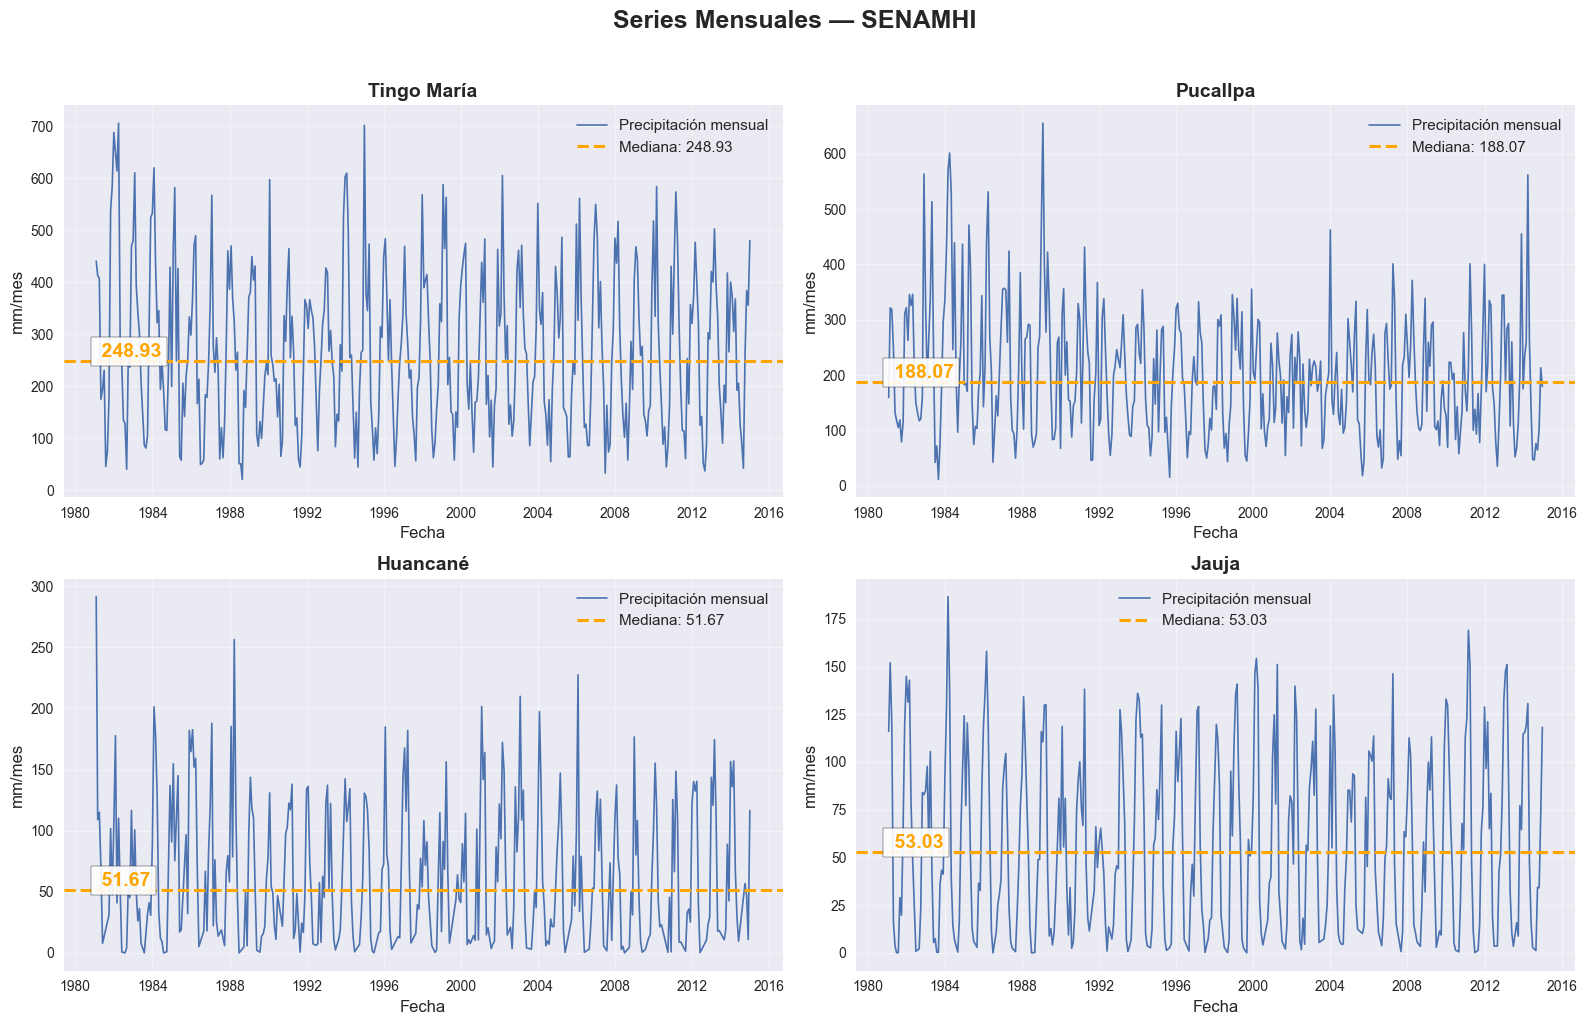


=== Generando figuras para ERA5 ===



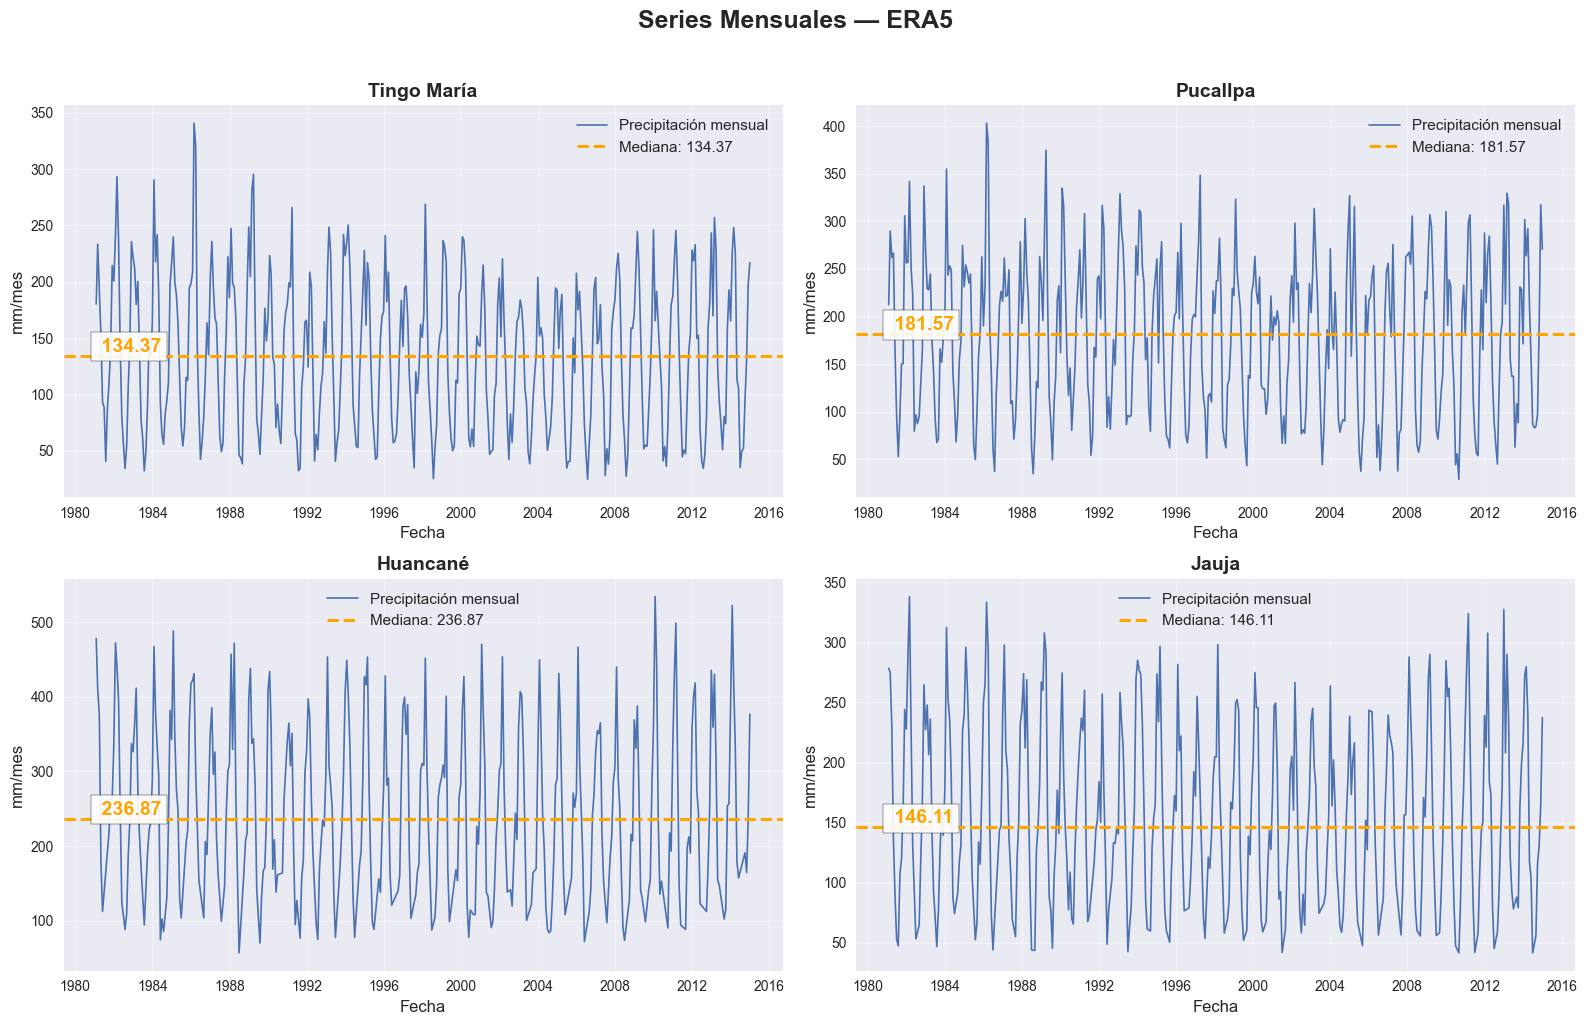

In [50]:
# ============================
# 1. Importar librerías
# ============================
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

plt.style.use("seaborn-v0_8")

# ============================
# 2. Configuración general
# ============================
datasets = ["CHIRPS", "SENAMHI", "ERA5"]

stations = {
    "Tingo María": tm,
    "Pucallpa": pu,
    "Huancané": hu,
    "Jauja": ja
}

# ============================
# 3. Función para graficar
# ============================
def plot_timeseries_4stations(dataset):

    fig, axes = plt.subplots(2, 2, figsize=(16, 10))
    axes = axes.flatten()

    for ax, (name, df) in zip(axes, stations.items()):
        
        if dataset not in df.columns:
            ax.text(0.5, 0.5, f"No existe la columna '{dataset}'",
                    ha="center", va="center")
            ax.set_axis_off()
            continue
        
        serie = df[dataset].dropna()
        time = serie.index
        values = serie.values
        
        if len(values) == 0:
            ax.text(0.5, 0.5, "Serie vacía",
                    ha="center", va="center")
            ax.set_axis_off()
            continue

        median = np.nanmedian(values)

        # Serie
        ax.plot(time, values, linewidth=1.2, label="Precipitación mensual")

        # Línea de mediana
        ax.axhline(median, color="orange", linestyle="--",
                   linewidth=2.2, label=f"Mediana: {median:.2f}")

        # Etiqueta
        ax.text(
            time[0],
            median,
            f" {median:.2f}",
            va="bottom",
            ha="left",
            fontsize=14,
            fontweight="bold",
            color="orange",
            bbox=dict(facecolor="white", alpha=0.9, edgecolor="black")
        )

        ax.set_title(name, fontsize=14, fontweight="bold")
        ax.set_ylabel("mm/mes", fontsize=12)
        ax.set_xlabel("Fecha", fontsize=12)
        ax.grid(True, alpha=0.4)

        # Leyenda
        ax.legend(fontsize=11)

    plt.suptitle(f"Series Mensuales — {dataset}", fontsize=18, fontweight="bold", y=1.02)
    plt.tight_layout()
    plt.show()

# ============================
# 4. Ejecutar para todos los datasets
# ============================
for dataset in datasets:
    print(f"\n=== Generando figuras para {dataset} ===\n")
    plot_timeseries_4stations(dataset)


MODELO DE PREDICCIÓN UTILIZANDO RANDOM FOREST


=== Estación: Huancané ===
RMSE test = 38.74
MAE  test = 28.37
R²   test = 0.432


c:\Users\mariosb\neuron\Lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
c:\Users\mariosb\neuron\Lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
c:\Users\mariosb\neuron\Lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
c:\Users\mariosb\neuron\Lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
c:\Users\mariosb\neuron\Lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
c:\Us

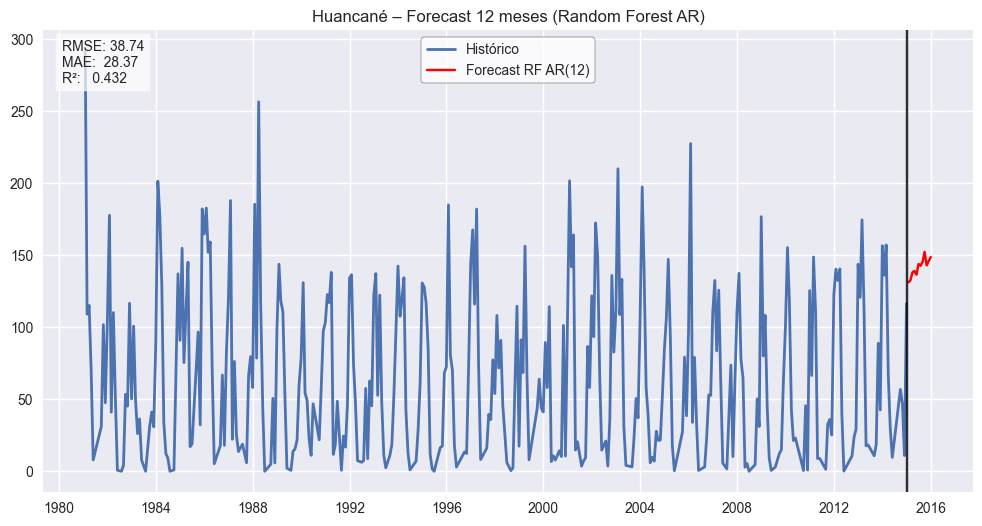


=== Estación: Jauja ===
RMSE test = 14.40
MAE  test = 11.64
R²   test = 0.910


c:\Users\mariosb\neuron\Lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
c:\Users\mariosb\neuron\Lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
c:\Users\mariosb\neuron\Lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
c:\Users\mariosb\neuron\Lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
c:\Users\mariosb\neuron\Lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
c:\Us

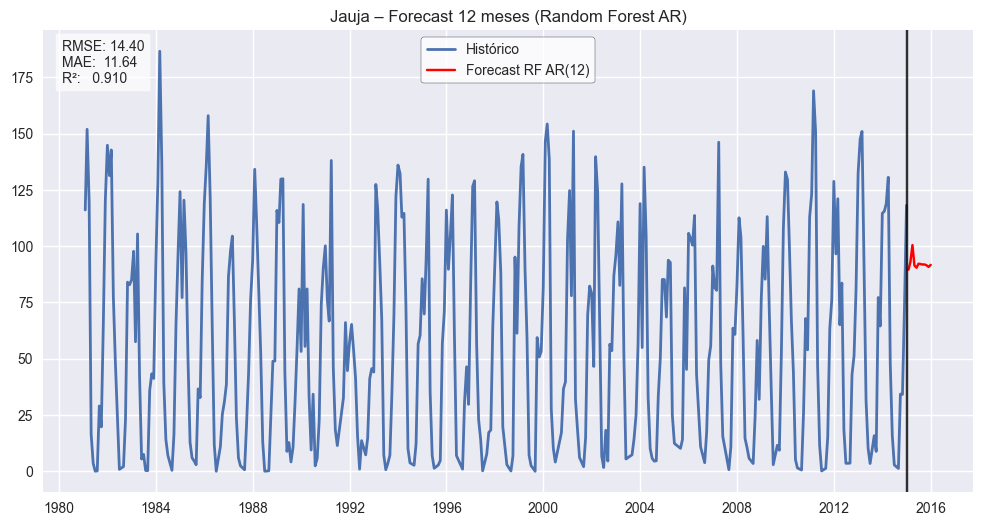


=== Estación: Pucallpa ===
RMSE test = 102.04
MAE  test = 81.38
R²   test = 0.456


c:\Users\mariosb\neuron\Lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
c:\Users\mariosb\neuron\Lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
c:\Users\mariosb\neuron\Lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
c:\Users\mariosb\neuron\Lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
c:\Users\mariosb\neuron\Lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
c:\Us

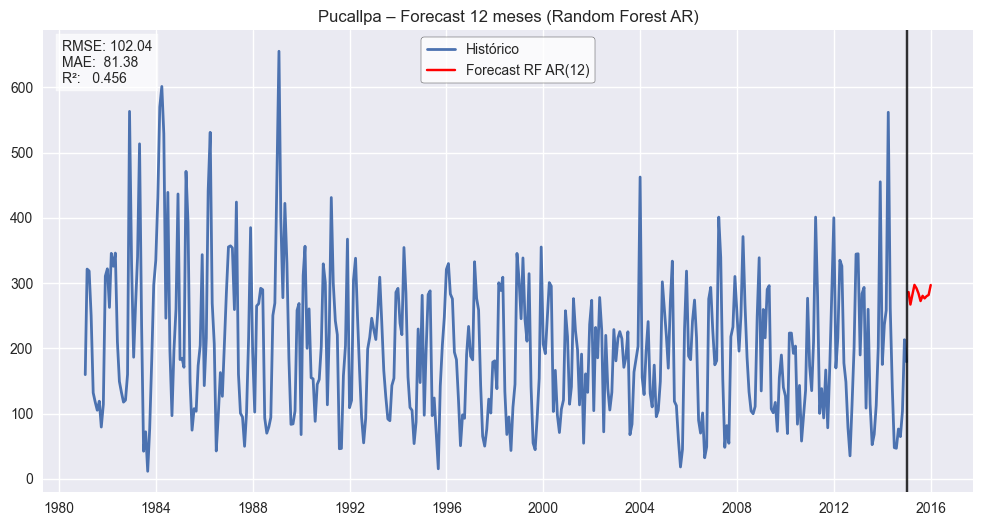


=== Estación: Tingo María ===
RMSE test = 68.71
MAE  test = 50.15
R²   test = 0.718


c:\Users\mariosb\neuron\Lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
c:\Users\mariosb\neuron\Lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
c:\Users\mariosb\neuron\Lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
c:\Users\mariosb\neuron\Lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
c:\Users\mariosb\neuron\Lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
c:\Us

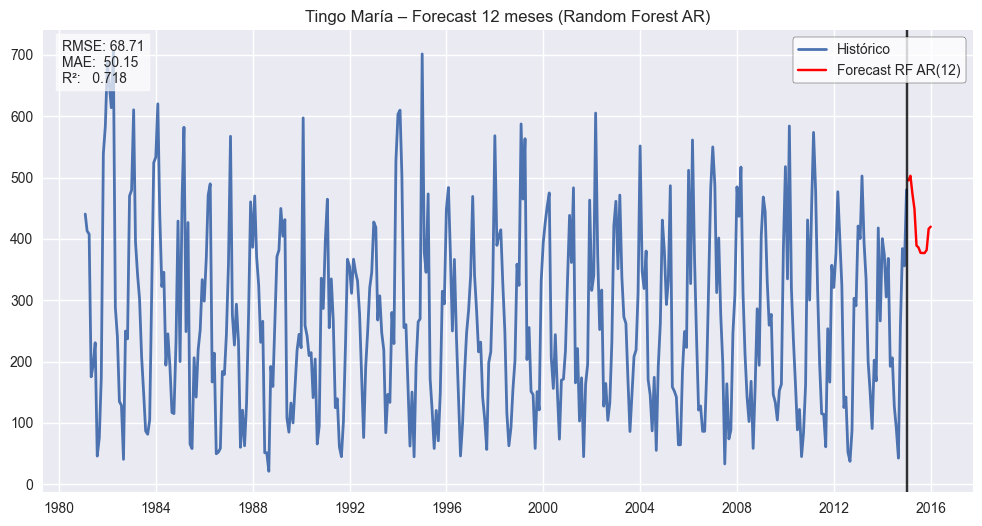


FORECAST de las 4 estaciones:
              Huancané       Jauja    Pucallpa  Tingo María
2015-01-31  131.205765   89.594773  286.260176   495.369375
2015-02-28  132.523743   93.035272  267.104831   502.836119
2015-03-31  138.057898  100.513415  282.655307   472.880507
2015-04-30  139.016053   91.388446  297.228618   448.800990
2015-05-31  136.387878   90.436114  292.011846   389.008158
2015-06-30  143.807368   92.223244  284.140636   385.860959
2015-07-31  142.612358   92.072464  272.468305   377.154624
2015-08-31  145.278223   91.852084  280.468071   376.859900
2015-09-30  152.203630   91.889457  276.563459   376.872586
2015-10-31  142.832788   91.477511  280.002106   381.757821
2015-11-30  145.794840   90.809506  281.774535   416.331104
2015-12-31  148.609150   91.711322  296.975427   419.784268


In [51]:
# ===================================================
# 1. Importar librerías
# ===================================================
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# ===================================================
# 2. Diccionario con las series por estación
# ===================================================
estaciones = {
    "Huancané": {
        "CHIRPS": hu_ch,
        "SENAMHI": hu_se,
        "ERA5":   hu_er
    },
    "Jauja": {
        "CHIRPS": ja_ch,
        "SENAMHI": ja_se,
        "ERA5":   ja_er
    },
    "Pucallpa": {
        "CHIRPS": pu_ch,
        "SENAMHI": pu_se,
        "ERA5":   pu_er
    },
    "Tingo María": {
        "CHIRPS": tm_ch,
        "SENAMHI": tm_se,
        "ERA5":   tm_er
    }
}

# Parámetros
max_lag = 12
forecast_horizon = 12
forecast_all = {}

# ===================================================
# 3. Loop general por estación
# ===================================================
for est, data in estaciones.items():

    print(f"\n=== Estación: {est} ===")

    # ----------------------------
    # 3.1 Construcción del DataFrame
    # ----------------------------
    df = pd.concat(
        [data["CHIRPS"], data["SENAMHI"], data["ERA5"]],
        axis=1
    )
    df.columns = ["CHIRPS", "SENAMHI", "ERA5"]

    df = df.replace(0, np.nan).dropna().sort_index()

    # ----------------------------
    # 3.2 Construcción de lags
    # ----------------------------
    for lag in range(1, max_lag + 1):
        df[f"SENAMHI_lag{lag}"] = df["SENAMHI"].shift(lag)
        df[f"CHIRPS_lag{lag}"]  = df["CHIRPS"].shift(lag)
        df[f"ERA5_lag{lag}"]    = df["ERA5"].shift(lag)

    df_lag = df.dropna()

    # ----------------------------
    # 3.3 División Train/Test
    # ----------------------------
    X = df_lag.drop(columns=["SENAMHI"])
    y = df_lag["SENAMHI"]

    train_size = len(df_lag) - forecast_horizon
    X_train, X_test = X.iloc[:train_size], X.iloc[train_size:]
    y_train, y_test = y.iloc[:train_size], y.iloc[train_size:]

    # ----------------------------
    # 3.4 Entrenamiento del modelo
    # ----------------------------
    rf = RandomForestRegressor(
        n_estimators=600,
        random_state=42
    )
    rf.fit(X_train, y_train)

    # ----------------------------
    # 3.5 Evaluación del modelo
    # ----------------------------
    y_pred_test = rf.predict(X_test)

    rmse = np.sqrt(mean_squared_error(y_test, y_pred_test))
    mae  = mean_absolute_error(y_test, y_pred_test)
    r2   = r2_score(y_test, y_pred_test)

    print(f"RMSE test = {rmse:.2f}")
    print(f"MAE  test = {mae:.2f}")
    print(f"R²   test = {r2:.3f}")

    # ===================================================
    # 4. Forecast autorregresivo (12 meses)
    # ===================================================
    last_row = df_lag.iloc[-1].copy()
    preds = []

    for i in range(1, forecast_horizon + 1):

        # Predicción mensual
        new_x = last_row.drop(labels=["SENAMHI"]).values.reshape(1, -1)
        pred = rf.predict(new_x)[0]
        preds.append(pred)

        # Actualizar lags → SENAMHI
        for lag in range(max_lag, 1, -1):
            last_row[f"SENAMHI_lag{lag}"] = last_row[f"SENAMHI_lag{lag-1}"]
        last_row["SENAMHI_lag1"] = pred

        # Actualizar persistencia → CHIRPS / ERA5
        for lag in range(max_lag, 1, -1):
            last_row[f"CHIRPS_lag{lag}"] = last_row[f"CHIRPS_lag{lag-1}"]
            last_row[f"ERA5_lag{lag}"]   = last_row[f"ERA5_lag{lag-1}"]

    # Índice del forecast
    forecast_index = [
        df_lag.index[-1] + pd.DateOffset(months=i)
        for i in range(1, forecast_horizon + 1)
    ]

    forecast_series = pd.Series(
        preds,
        index=forecast_index,
        name=f"{est}_Forecast"
    )
    forecast_all[est] = forecast_series

    # ===================================================
    # 5. Gráfico de resultados
    # ===================================================
    plt.figure(figsize=(12, 6))

    # Serie histórica
    plt.plot(df.index, df["SENAMHI"], label="Histórico", linewidth=2)

    # Forecast
    plt.plot(
        forecast_series.index,
        forecast_series,
        label="Forecast RF AR(12)",
        color="red"
    )

    # Línea que marca el inicio del forecast
    plt.axvline(df.index[-1], color="k", linestyle="-", alpha=0.8)

    # Insertar métricas
    texto = (
        f"RMSE: {rmse:.2f}\n"
        f"MAE:  {mae:.2f}\n"
        f"R²:   {r2:.3f}"
    )
    plt.text(
        0.02, 0.98, texto,
        transform=plt.gca().transAxes,
        fontsize=10,
        va="top",
        bbox=dict(facecolor="white", alpha=0.7)
    )

    plt.title(f"{est} – Forecast 12 meses (Random Forest AR)")
    plt.grid(True)

    plt.legend(
        frameon=True,
        facecolor="white",
        framealpha=0.8,
        edgecolor="black"
    )
    plt.show()

# ===================================================
# 6. Forecast combinado de todas las estaciones
# ===================================================
df_forecast = pd.DataFrame(forecast_all)

print("\nFORECAST de las 4 estaciones:")
print(df_forecast)


c:\Users\mariosb\neuron\Lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
c:\Users\mariosb\neuron\Lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
c:\Users\mariosb\neuron\Lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
c:\Users\mariosb\neuron\Lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
c:\Users\mariosb\neuron\Lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
c:\Us

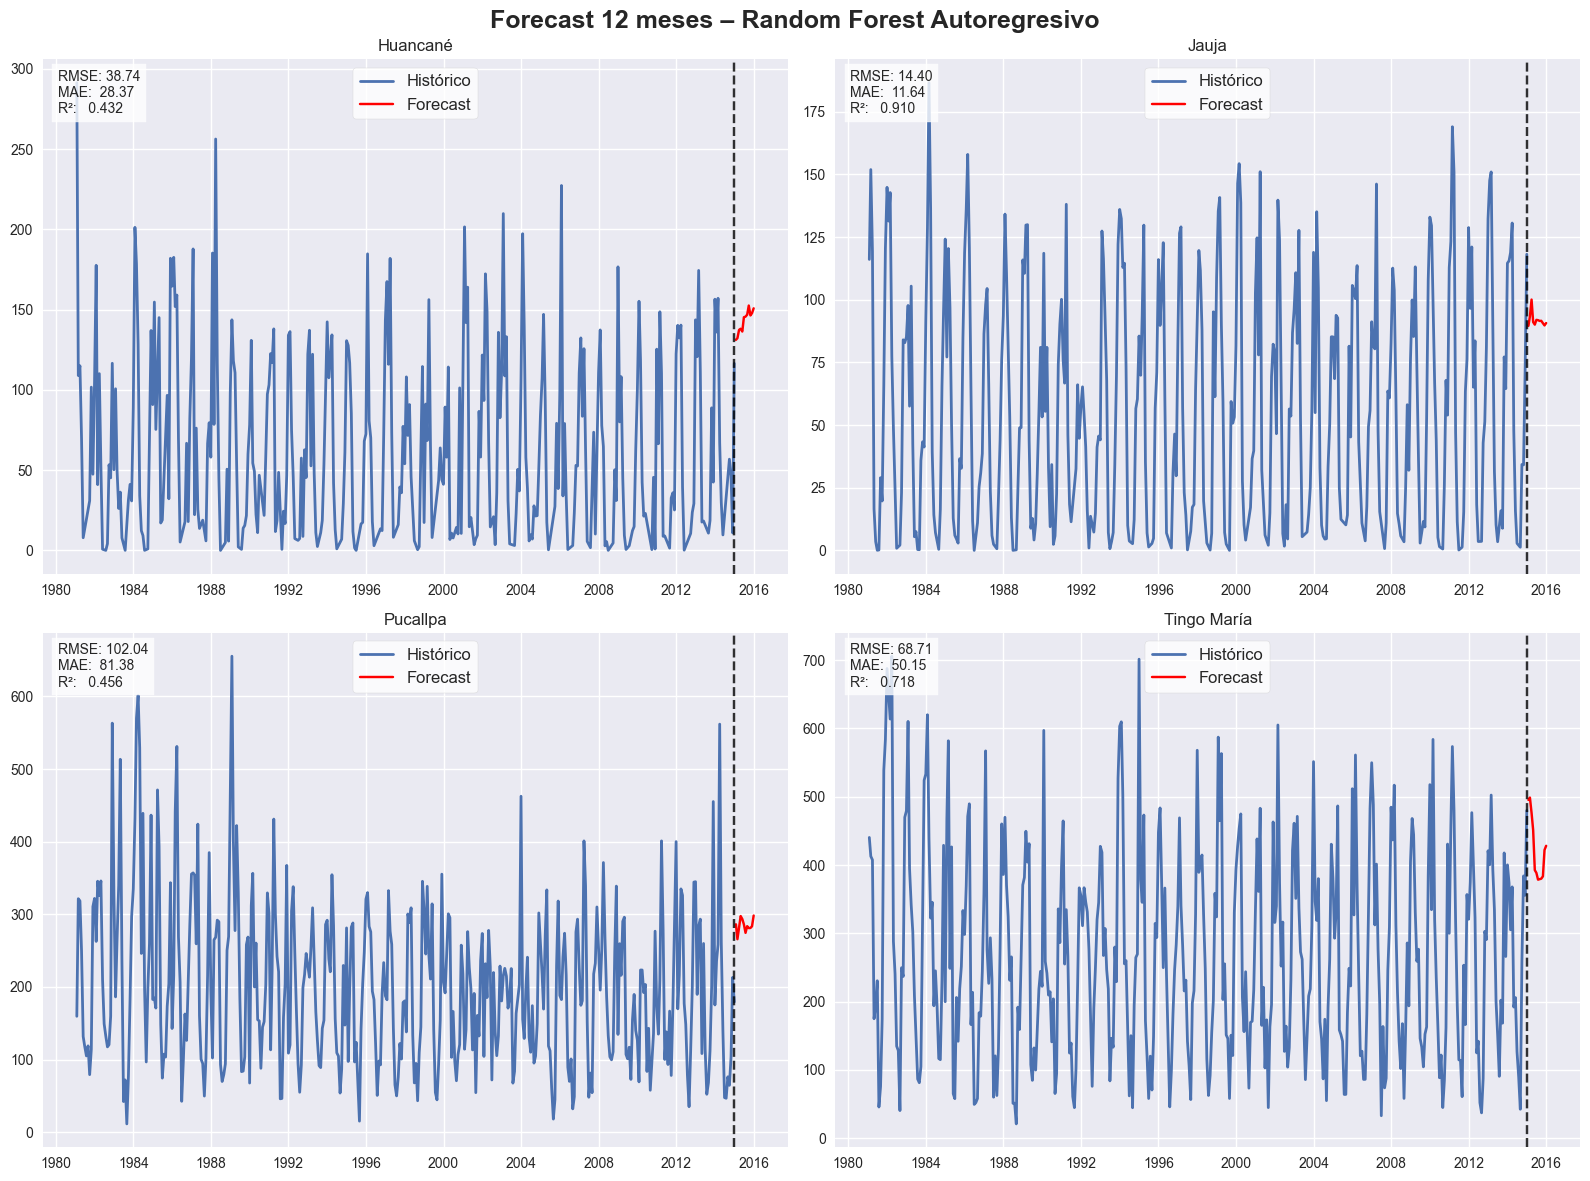

              Huancané       Jauja    Pucallpa  Tingo María
2015-01-31  131.205765   89.594773  286.260176   495.369375
2015-02-28  132.221026   93.377259  265.778617   498.830907
2015-03-31  137.405752  100.074873  281.763754   476.404066
2015-04-30  138.121378   91.097293  297.646989   451.214095
2015-05-31  136.373597   90.080301  293.511332   392.628362
2015-06-30  145.284336   91.978818  286.181500   388.533166
2015-07-31  145.670051   91.863057  274.524143   378.619122
2015-08-31  146.890982   91.555815  283.685563   379.423427
2015-09-30  152.569404   91.601739  281.060315   380.064650
2015-10-31  146.401258   90.642566  281.206752   383.529385
2015-11-30  147.824061   89.768299  283.566706   422.078626
2015-12-31  150.838569   90.713707  298.345177   428.205553


In [57]:
# ==============================
# FIGURA GENERAL CON 4 SUBPLOTS
# ==============================

fig, axs = plt.subplots(2, 2, figsize=(16, 12))
axs = axs.ravel()   # Facilita la iteración por subplots

forecast_all = {}
i = 0

for est, data in estaciones.items():
    
    # -------------------------
    # Preparación del dataframe
    # -------------------------
    df = pd.concat([data["CHIRPS"], data["SENAMHI"], data["ERA5"]], axis=1)
    df.columns = ["CHIRPS", "SENAMHI", "ERA5"]
    df = df.replace(0, np.nan).dropna().sort_index()

    # Crear lags
    for lag in range(1, max_lag + 1):
        df[f"SENAMHI_lag{lag}"] = df["SENAMHI"].shift(lag)
        df[f"CHIRPS_lag{lag}"] = df["CHIRPS"].shift(lag)
        df[f"ERA5_lag{lag}"] = df["ERA5"].shift(lag)

    df_lag = df.dropna()

    # -------------------------
    # División train / test
    # -------------------------
    X = df_lag.drop(columns=["SENAMHI"])
    y = df_lag["SENAMHI"]

    train_size = len(df_lag) - 12
    X_train, X_test = X.iloc[:train_size], X.iloc[train_size:]
    y_train, y_test = y.iloc[:train_size], y.iloc[train_size:]

    # -------------------------
    # Modelo Random Forest
    # -------------------------
    rf = RandomForestRegressor(n_estimators=600, random_state=42)
    rf.fit(X_train, y_train)

    # Métricas
    y_pred_test = rf.predict(X_test)
    rmse = np.sqrt(mean_squared_error(y_test, y_pred_test))
    mae  = mean_absolute_error(y_test, y_pred_test)
    r2   = r2_score(y_test, y_pred_test)

    # -------------------------
    # Forecast autoregresivo
    # -------------------------
    last_row = df_lag.iloc[-1].copy()
    preds = []

    for h in range(1, forecast_horizon + 1):

        # Entrada del modelo
        new_x = last_row.drop(labels=["SENAMHI"]).values.reshape(1, -1)
        pred = rf.predict(new_x)[0]
        preds.append(pred)

        # Actualización de lags
        for lag in range(max_lag, 1, -1):
            last_row[f"SENAMHI_lag{lag}"] = last_row[f"SENAMHI_lag{lag-1}"]
            last_row[f"CHIRPS_lag{lag}"] = last_row[f"CHIRPS_lag{lag-1}"]
            last_row[f"ERA5_lag{lag}"] = last_row[f"ERA5_lag{lag-1}"]

        last_row["SENAMHI_lag1"] = pred
        last_row["CHIRPS_lag1"] = last_row["CHIRPS"]
        last_row["ERA5_lag1"] = last_row["ERA5"]

    # Construcción del índice futuro
    forecast_index = [
        df_lag.index[-1] + pd.DateOffset(months=h)
        for h in range(1, forecast_horizon + 1)
    ]
    forecast_series = pd.Series(preds, index=forecast_index)
    forecast_all[est] = forecast_series

    # -------------------------
    # Subplot
    # -------------------------
    ax = axs[i]
    i += 1

    ax.plot(df.index, df["SENAMHI"], label="Histórico", linewidth=2)
    ax.plot(forecast_series.index, forecast_series, label="Forecast", color="red")
    ax.axvline(df.index[-1], color="k", linestyle="--", alpha=0.8)

    # Cuadro con métricas
    texto = (
        f"RMSE: {rmse:.2f}\n"
        f"MAE:  {mae:.2f}\n"
        f"R²:   {r2:.3f}"
    )
    ax.text(
        0.02, 0.98, texto,
        transform=ax.transAxes,
        fontsize=10,
        va="top",
        bbox=dict(facecolor="white", alpha=0.8)
    )

    ax.set_title(est)
    ax.grid(True)

    # LEYENDA MÁS GRANDE (fontsize=12)
    ax.legend(frameon=True, facecolor="white", framealpha=0.8, fontsize=12)

# -------------------------
# Título general de la figura
# -------------------------
plt.suptitle("Forecast 12 meses – Random Forest Autoregresivo", fontsize=18,  fontweight="bold")
plt.tight_layout()
plt.show()

# ==============================
# TABLA FINAL DE FORECASTS
# ==============================
df_forecast = pd.DataFrame(forecast_all)
print(df_forecast)


MODELOS DE PREDICCIÓN UTILIZANDO REGRESIÓN LINEAL


====================== Estación: Huancané ======================


c:\Users\mariosb\neuron\Lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
c:\Users\mariosb\neuron\Lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
c:\Users\mariosb\neuron\Lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
c:\Users\mariosb\neuron\Lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
c:\Users\mariosb\neuron\Lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
c:\Users\mariosb\neuron\Lib\si

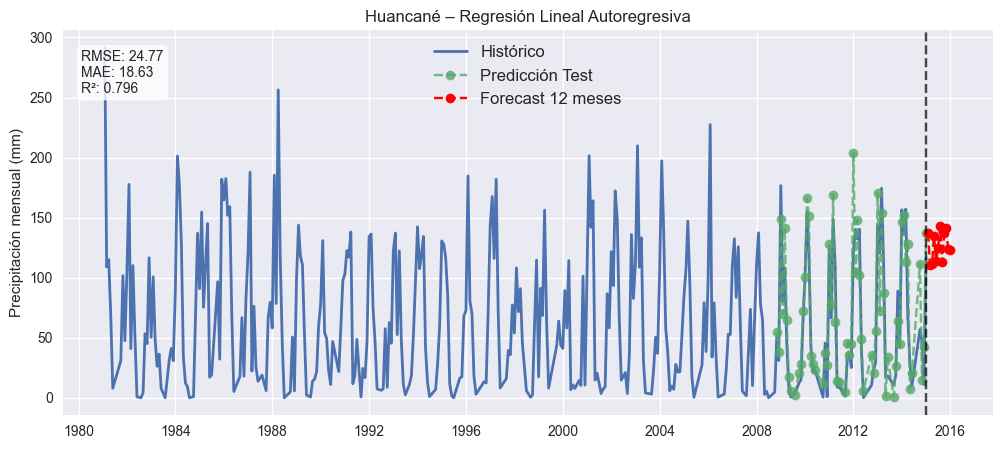


====================== Estación: Jauja ======================


c:\Users\mariosb\neuron\Lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
c:\Users\mariosb\neuron\Lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
c:\Users\mariosb\neuron\Lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
c:\Users\mariosb\neuron\Lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
c:\Users\mariosb\neuron\Lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
c:\Users\mariosb\neuron\Lib\si

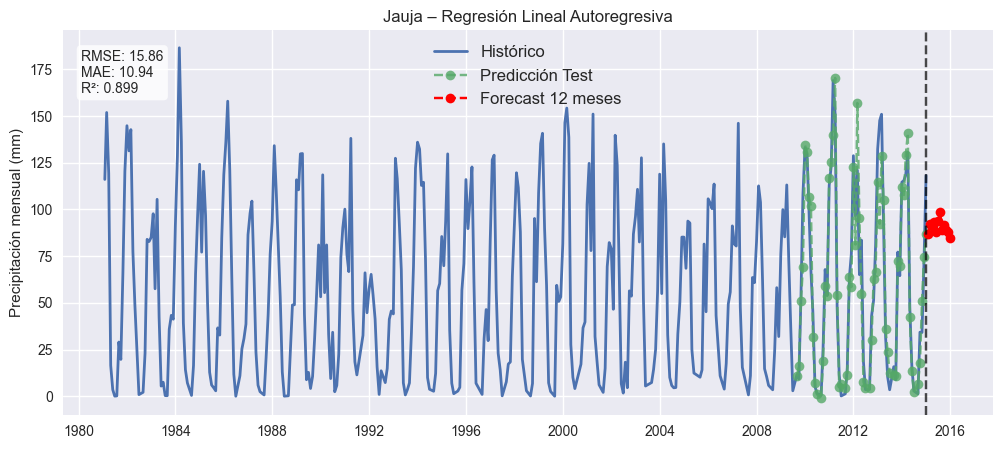

c:\Users\mariosb\neuron\Lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
c:\Users\mariosb\neuron\Lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
c:\Users\mariosb\neuron\Lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
c:\Users\mariosb\neuron\Lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
c:\Users\mariosb\neuron\Lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
c:\Users\mariosb\neuron\Lib\si


====================== Estación: Pucallpa ======================


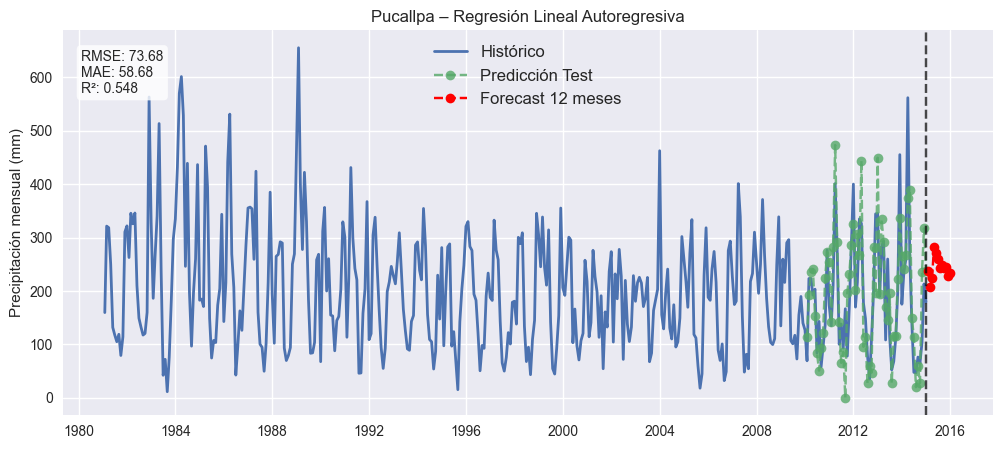


====================== Estación: Tingo María ======================


c:\Users\mariosb\neuron\Lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
c:\Users\mariosb\neuron\Lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
c:\Users\mariosb\neuron\Lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
c:\Users\mariosb\neuron\Lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
c:\Users\mariosb\neuron\Lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
c:\Users\mariosb\neuron\Lib\si

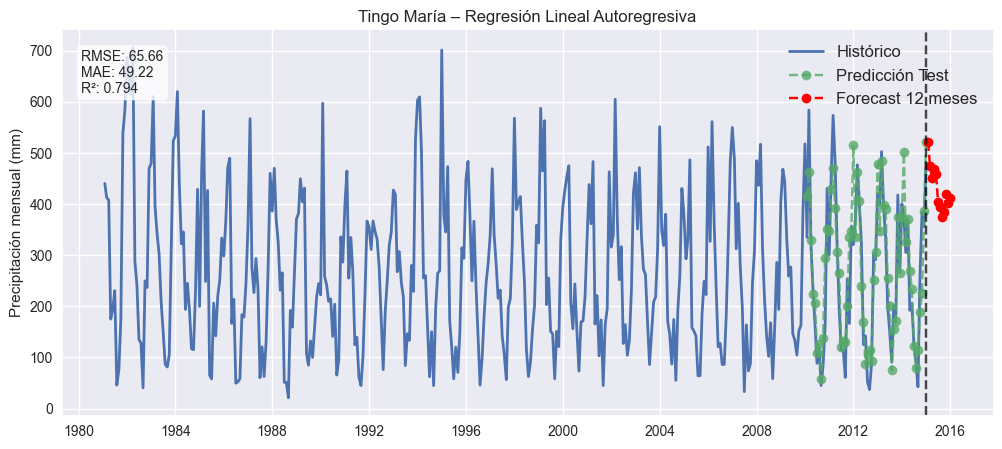

              Huancané      Jauja    Pucallpa  Tingo María
2015-01-31  137.505998  87.094893  237.818287   521.485292
2015-02-28  110.772597  92.363449  206.932246   475.256573
2015-03-31  111.142597  91.359746  223.440500   450.997281
2015-04-30  134.929682  93.457584  282.445540   467.802998
2015-05-31  114.013614  88.209030  270.402970   458.471891
2015-06-30  124.984156  93.778473  260.063280   403.250239
2015-07-31  142.661774  98.565206  242.470879   394.669489
2015-08-31  112.800129  88.791936  248.532189   373.808545
2015-09-30  137.093828  91.580939  243.507945   383.759117
2015-10-31  141.158986  89.058759  244.227614   420.411035
2015-11-30  123.494457  87.766174  228.803750   401.953346
2015-12-31  122.886642  84.601335  233.171034   411.022593


In [58]:
# ===================================================
# 0) Importar librerías
# ===================================================
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error


# ===================================================
# 1) Diccionario con las series por estación
# ===================================================
estaciones = {
    "Huancané":     {"CHIRPS": hu_ch, "SENAMHI": hu_se, "ERA5": hu_er},
    "Jauja":        {"CHIRPS": ja_ch, "SENAMHI": ja_se, "ERA5": ja_er},
    "Pucallpa":     {"CHIRPS": pu_ch, "SENAMHI": pu_se, "ERA5": pu_er},
    "Tingo María":  {"CHIRPS": tm_ch, "SENAMHI": tm_se, "ERA5": tm_er},
}


# ===================================================
# 2) Parámetros del modelo
# ===================================================
max_lag = 12           # rezagos
forecast_horizon = 12  # meses a predecir
test_months = 60       # últimos 5 años (60 meses)

forecast_all = {}      # almacenará los 12 meses de forecast para cada estación


# ===================================================
# 3) Loop principal por estación
# ===================================================
for est, data in estaciones.items():
    print(f"\n====================== Estación: {est} ======================")

    # ---------------------------------------------------
    # (A) Construcción del dataframe
    # ---------------------------------------------------
    df = pd.concat([data["CHIRPS"], data["SENAMHI"], data["ERA5"]], axis=1)
    df.columns = ["CHIRPS", "SENAMHI", "ERA5"]
    df = df.replace(0, np.nan).dropna().sort_index()

    # ---------------------------------------------------
    # (B) Crear variables rezagadas (lags)
    # ---------------------------------------------------
    for lag in range(1, max_lag + 1):
        df[f"SEN_lag{lag}"] = df["SENAMHI"].shift(lag)
        df[f"CHIRPS_lag{lag}"] = df["CHIRPS"].shift(lag)
        df[f"ERA5_lag{lag}"] = df["ERA5"].shift(lag)

    df_lag = df.dropna()

    # ---------------------------------------------------
    # (C) Matrices X y y
    # ---------------------------------------------------
    X = df_lag.drop(columns=["SENAMHI"])
    y = df_lag["SENAMHI"]

    # ---------------------------------------------------
    # (D) Separación Train / Test
    # ---------------------------------------------------
    train_size = len(df_lag) - test_months
    X_train, X_test = X.iloc[:train_size], X.iloc[train_size:]
    y_train, y_test = y.iloc[:train_size], y.iloc[train_size:]

    # ---------------------------------------------------
    # (E) Entrenamiento de la regresión lineal
    # ---------------------------------------------------
    model = LinearRegression()
    model.fit(X_train, y_train)

    # ---------------------------------------------------
    # (F) Evaluación en el set de prueba
    # ---------------------------------------------------
    y_pred_test = model.predict(X_test)

    rmse = np.sqrt(mean_squared_error(y_test, y_pred_test))
    mae  = mean_absolute_error(y_test, y_pred_test)
    r2   = r2_score(y_test, y_pred_test)

    # ---------------------------------------------------
    # (G) Forecast autoregresivo a 12 meses
    # ---------------------------------------------------
    last_row = df_lag.iloc[-1].copy()
    preds = []

    for h in range(forecast_horizon):

        # Predicción del siguiente mes
        X_new = last_row.drop(labels=["SENAMHI"]).values.reshape(1, -1)
        pred = model.predict(X_new)[0]
        preds.append(pred)

        # Actualizar las variables rezagadas
        for lag in range(max_lag, 1, -1):
            last_row[f"SEN_lag{lag}"]    = last_row[f"SEN_lag{lag-1}"]
            last_row[f"CHIRPS_lag{lag}"] = last_row[f"CHIRPS_lag{lag-1}"]
            last_row[f"ERA5_lag{lag}"]   = last_row[f"ERA5_lag{lag-1}"]

        last_row["SEN_lag1"] = pred
        last_row["CHIRPS_lag1"] = last_row["CHIRPS"]
        last_row["ERA5_lag1"]   = last_row["ERA5"]

    # Índice futuro
    forecast_index = [
        df_lag.index[-1] + pd.DateOffset(months=h+1)
        for h in range(forecast_horizon)
    ]

    forecast_series = pd.Series(preds, index=forecast_index, name=f"{est}_Forecast")
    forecast_all[est] = forecast_series

    # ---------------------------------------------------
    # (H) Gráfico histórico + test + forecast
    # ---------------------------------------------------
    plt.figure(figsize=(12, 5))

    plt.plot(df.index, df["SENAMHI"], label="Histórico", linewidth=2)
    plt.plot(y_test.index, y_pred_test, "--o", label="Predicción Test", alpha=0.8)
    plt.plot(forecast_series.index, forecast_series.values,
             "--o", label="Forecast 12 meses", color="red")

    plt.axvline(df.index[-1], color="k", linestyle="--", alpha=0.7)

    # Cuadro con métricas
    textstr = f"RMSE: {rmse:.2f}\nMAE: {mae:.2f}\nR²: {r2:.3f}"
    plt.gca().text(
        0.02, 0.95, textstr,
        transform=plt.gca().transAxes,
        fontsize=10, va="top", ha="left",
        bbox=dict(boxstyle="round", facecolor="white", alpha=0.8)
    )

    plt.title(f"{est} – Regresión Lineal Autoregresiva")
    plt.ylabel("Precipitación mensual (mm)")
    plt.grid(True)
    plt.legend(fontsize=12)
    plt.show()


# ===================================================
# 4) Unir todos los forecasts en un DataFrame final
# ===================================================
df_forecast = pd.DataFrame(forecast_all)
print(df_forecast)



=== Estación: Huancané ===

=== Estación: Jauja ===

=== Estación: Pucallpa ===

=== Estación: Tingo María ===


c:\Users\mariosb\neuron\Lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
c:\Users\mariosb\neuron\Lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
c:\Users\mariosb\neuron\Lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
c:\Users\mariosb\neuron\Lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
c:\Users\mariosb\neuron\Lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
c:\Users\mariosb\neuron\Lib\si

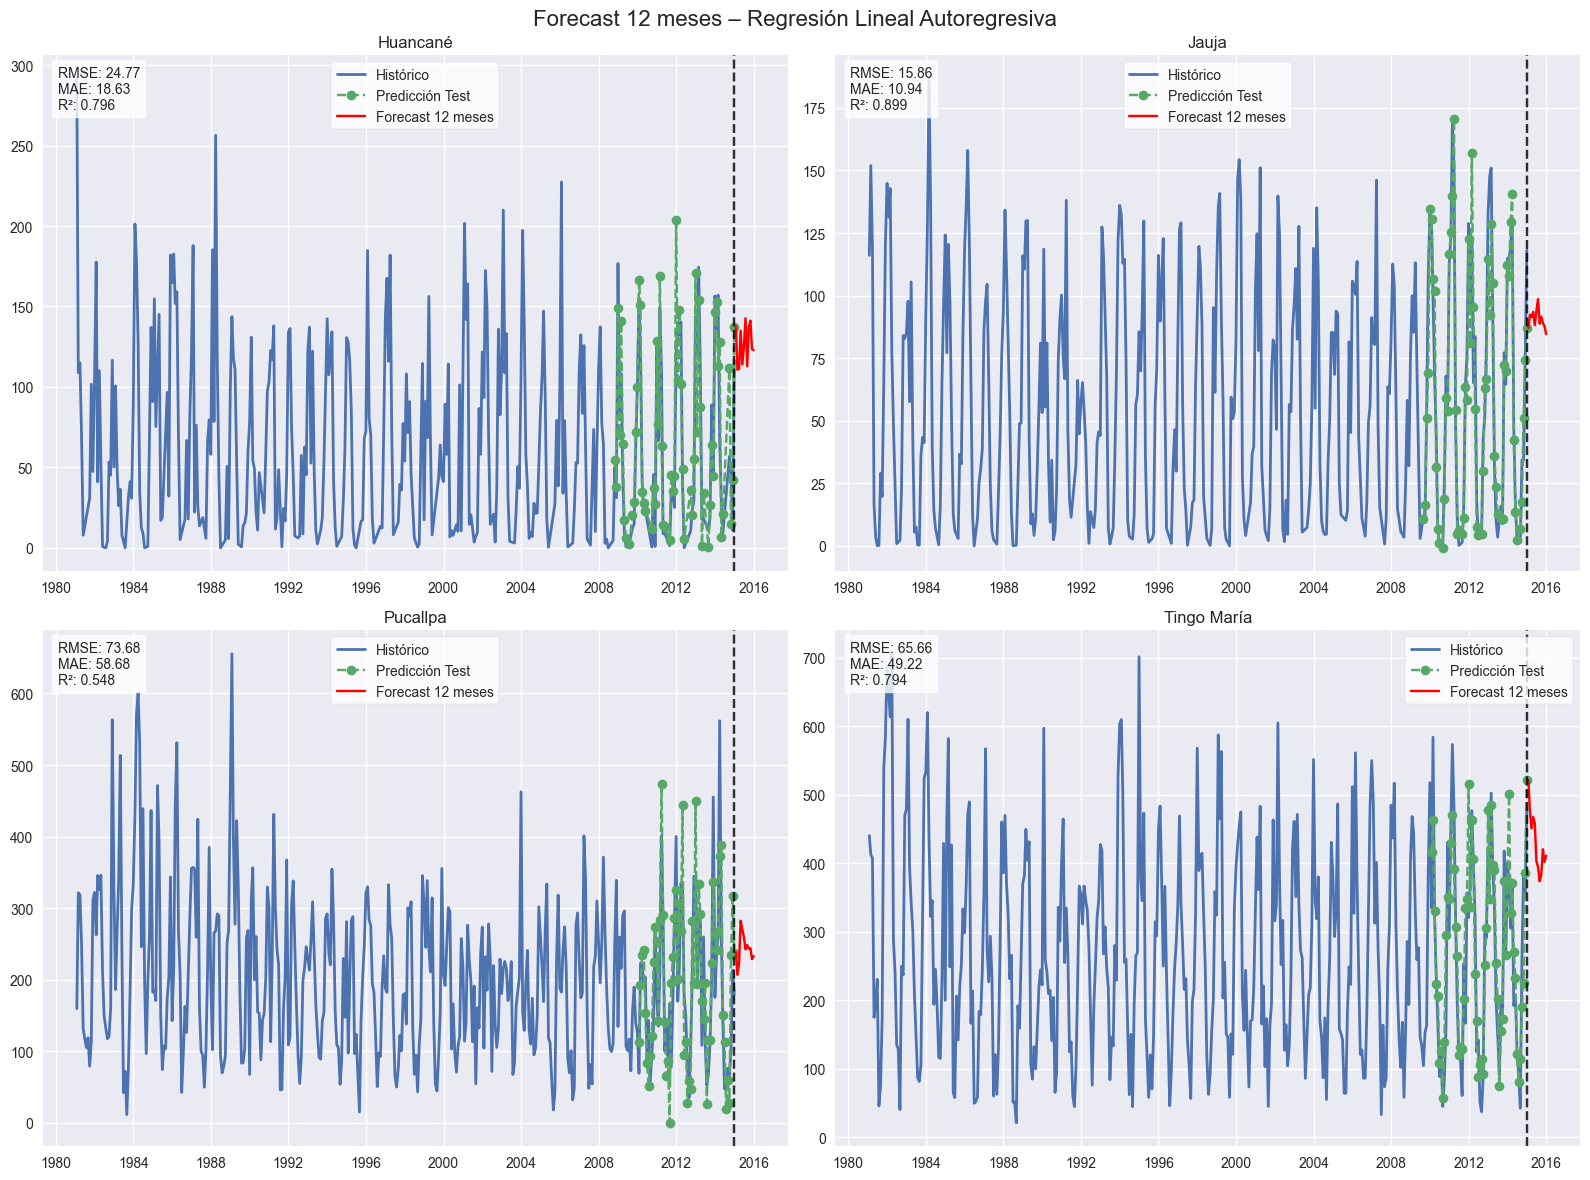

              Huancané      Jauja    Pucallpa  Tingo María
2015-01-31  137.505998  87.094893  237.818287   521.485292
2015-02-28  110.772597  92.363449  206.932246   475.256573
2015-03-31  111.142597  91.359746  223.440500   450.997281
2015-04-30  134.929682  93.457584  282.445540   467.802998
2015-05-31  114.013614  88.209030  270.402970   458.471891
2015-06-30  124.984156  93.778473  260.063280   403.250239
2015-07-31  142.661774  98.565206  242.470879   394.669489
2015-08-31  112.800129  88.791936  248.532189   373.808545
2015-09-30  137.093828  91.580939  243.507945   383.759117
2015-10-31  141.158986  89.058759  244.227614   420.411035
2015-11-30  123.494457  87.766174  228.803750   401.953346
2015-12-31  122.886642  84.601335  233.171034   411.022593


In [60]:
# ==========================
# Forecast con 4 subplots
# ==========================

fig, axs = plt.subplots(2, 2, figsize=(16, 12))
axs = axs.ravel()
forecast_all = {}
i = 0

for est, data in estaciones.items():

    print(f"\n=== Estación: {est} ===")

    # =========================================
    # Preparación del DataFrame
    # =========================================
    df = pd.concat([data["CHIRPS"], data["SENAMHI"], data["ERA5"]], axis=1)
    df.columns = ["CHIRPS", "SENAMHI", "ERA5"]
    df = df.replace(0, np.nan).dropna()
    df = df.sort_index()

    # Crear lags
    for lag in range(1, max_lag + 1):
        df[f"SEN_lag{lag}"] = df["SENAMHI"].shift(lag)
        df[f"CHIRPS_lag{lag}"] = df["CHIRPS"].shift(lag)
        df[f"ERA5_lag{lag}"] = df["ERA5"].shift(lag)

    df_lag = df.dropna()

    # =========================================
    # Matrices para el modelo
    # =========================================
    X = df_lag.drop(columns=["SENAMHI"])
    y = df_lag["SENAMHI"]

    train_size = len(df_lag) - test_months
    X_train, X_test = X.iloc[:train_size], X.iloc[train_size:]
    y_train, y_test = y.iloc[:train_size], y.iloc[train_size:]

    # =========================================
    # Modelo
    # =========================================
    model = LinearRegression()
    model.fit(X_train, y_train)

    # Predicción test
    y_pred_test = model.predict(X_test)

    rmse = np.sqrt(mean_squared_error(y_test, y_pred_test))
    mae  = mean_absolute_error(y_test, y_pred_test)
    r2   = r2_score(y_test, y_pred_test)

    # =========================================
    # Forecast autoregresivo 12 meses
    # =========================================
    last_row = df_lag.iloc[-1].copy()
    forecast = []

    for h in range(forecast_horizon):

        X_new = last_row.drop(labels=["SENAMHI"]).values.reshape(1, -1)
        pred = model.predict(X_new)[0]
        forecast.append(pred)

        # actualizar lags
        for lag in range(max_lag, 1, -1):
            last_row[f"SEN_lag{lag}"] = last_row[f"SEN_lag{lag-1}"]
            last_row[f"CHIRPS_lag{lag}"] = last_row[f"CHIRPS_lag{lag-1}"]
            last_row[f"ERA5_lag{lag}"] = last_row[f"ERA5_lag{lag-1}"]

        last_row["SEN_lag1"] = pred
        last_row["CHIRPS_lag1"] = last_row["CHIRPS"]
        last_row["ERA5_lag1"] = last_row["ERA5"]

    forecast_index = [
        df_lag.index[-1] + pd.DateOffset(months=h + 1)
        for h in range(forecast_horizon)
    ]

    forecast_series = pd.Series(forecast, index=forecast_index)
    forecast_all[est] = forecast_series

    # =========================================
    # Subplot
    # =========================================
    ax = axs[i]
    i += 1

    ax.plot(df.index, df["SENAMHI"], label="Histórico", linewidth=2)
    ax.plot(y_test.index, y_pred_test, "--o", label="Predicción Test")
    ax.plot(forecast_series.index, forecast_series, label="Forecast 12 meses", color="red")

    ax.axvline(df.index[-1], color="k", linestyle="--", alpha=0.8)

    # Cuadro métricas
    texto = f"RMSE: {rmse:.2f}\nMAE: {mae:.2f}\nR²: {r2:.3f}"
    ax.text(
        0.02, 0.98, texto,
        transform=ax.transAxes,
        fontsize=10,
        va="top",
        bbox=dict(facecolor="white", alpha=0.8)
    )

    ax.set_title(est)
    ax.grid(True)
    ax.legend(frameon=True, facecolor="white", framealpha=0.8)

# =========================================
# Gráfico final
# =========================================
plt.suptitle("Forecast 12 meses – Regresión Lineal Autoregresiva", fontsize=16)
plt.tight_layout()
plt.show()

# =========================================
# DataFrame final con Forecast
# =========================================
df_forecast = pd.DataFrame(forecast_all)
print(df_forecast)


PREDICCIÓN UTILIZANDO LSTM


=== Procesando Estación: Huancané ===
  -> LSTM RMSE: 25.26 | R2: 0.797

=== Procesando Estación: Jauja ===
  -> LSTM RMSE: 21.61 | R2: 0.828

=== Procesando Estación: Pucallpa ===
  -> LSTM RMSE: 90.74 | R2: 0.392

=== Procesando Estación: Tingo María ===
  -> LSTM RMSE: 73.22 | R2: 0.731


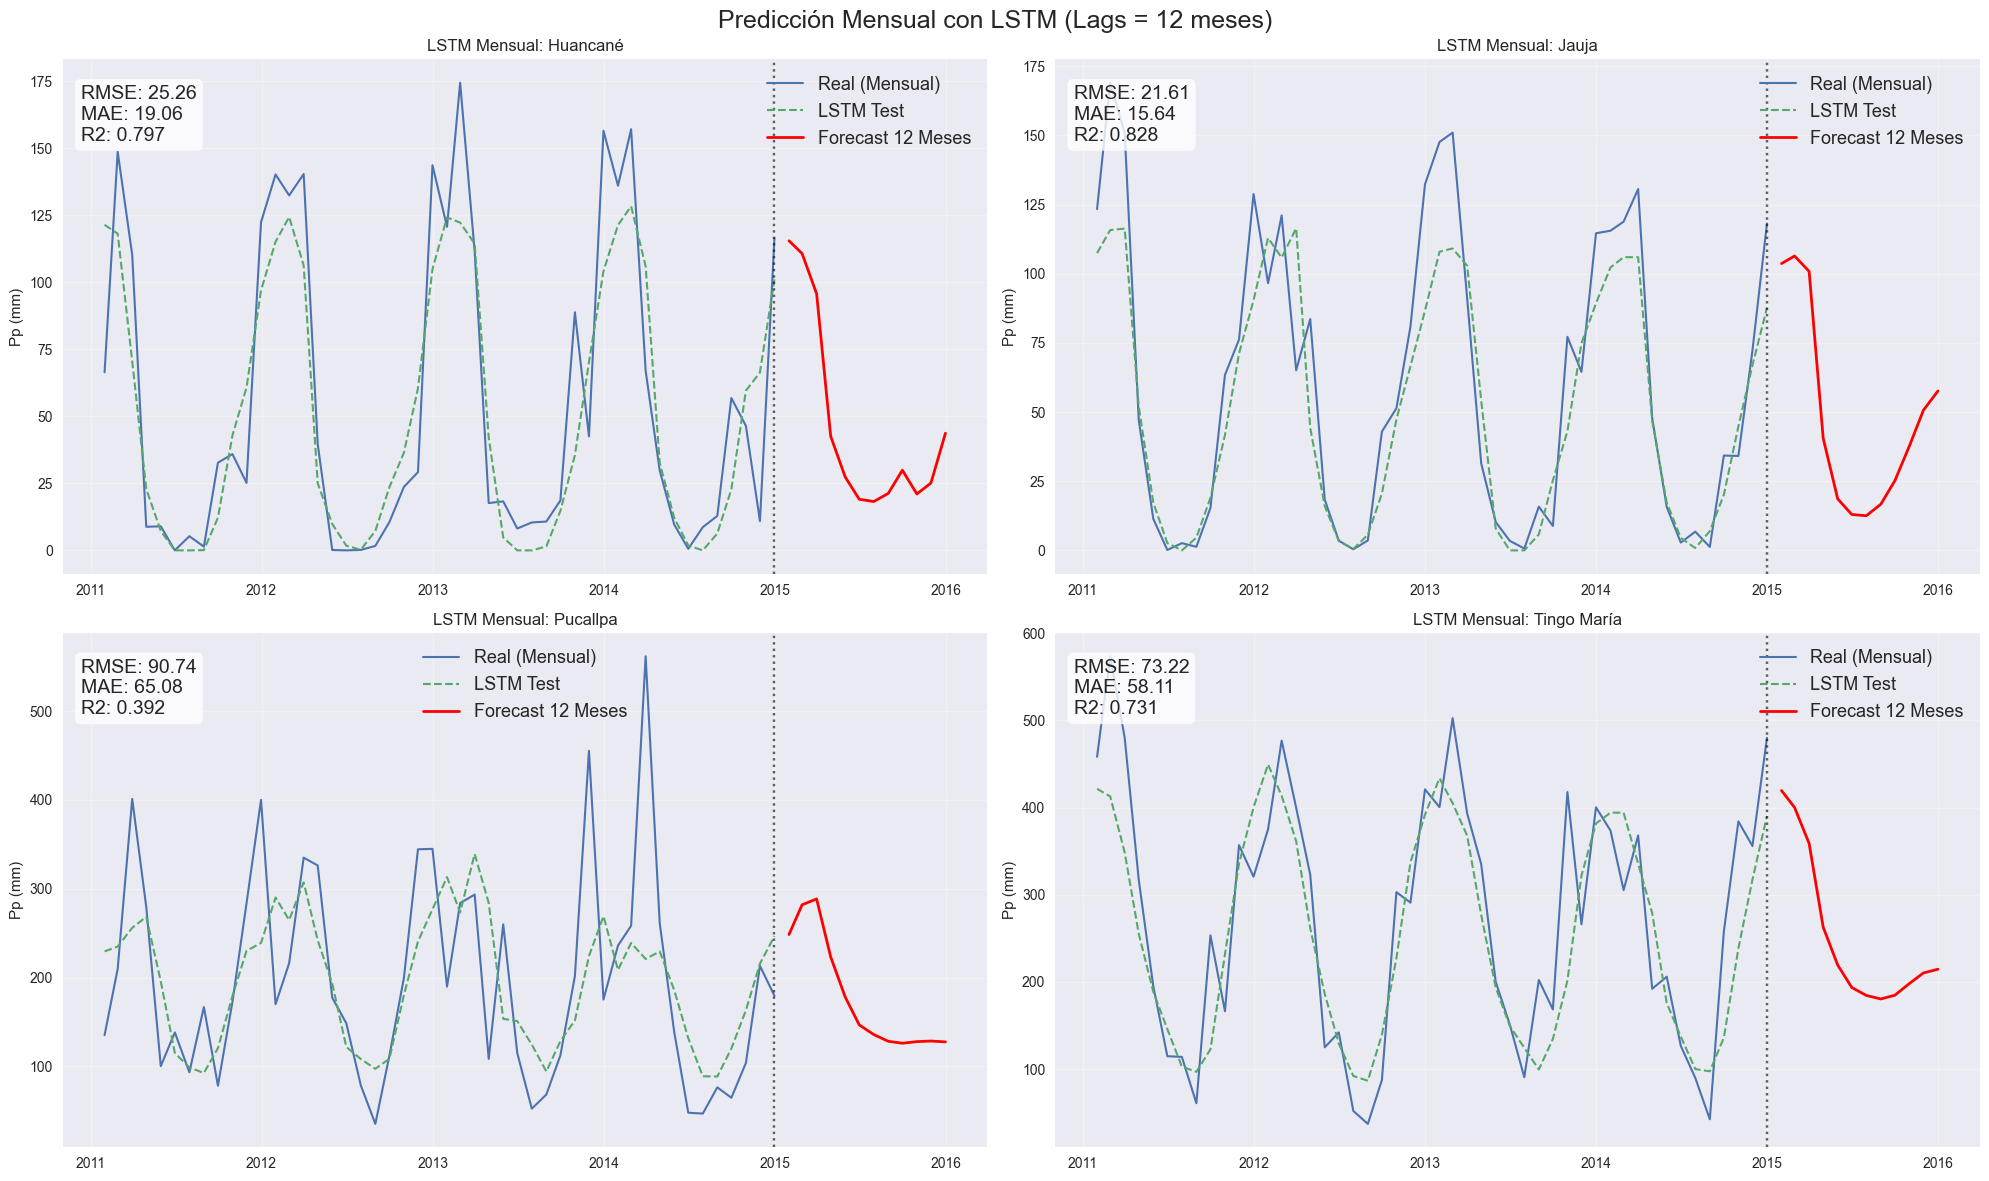

In [65]:
# =============================================================================
# 1. IMPORTACIONES Y CONFIGURACIÓN INICIAL
# =============================================================================
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout
import warnings
warnings.filterwarnings("ignore")

# =============================================================================
# 2. LISTA DE ESTACIONES Y ASOCIACIÓN DE SERIES
# =============================================================================

estaciones = {
    "Huancané":   {"ch": hu_ch, "se": hu_se, "er": hu_er},
    "Jauja":      {"ch": ja_ch, "se": ja_se, "er": ja_er},
    "Pucallpa":   {"ch": pu_ch, "se": pu_se, "er": pu_er},
    "Tingo María": {"ch": tm_ch, "se": tm_se, "er": tm_er}
}

max_lag = 12
forecast_horizon = 12
test_months = 48

# Crear secuencias para LSTM
def create_dataset(X, y, time_steps=1):
    Xs, ys = [], []
    for i in range(len(X) - time_steps):
        Xs.append(X.iloc[i:(i + time_steps)].values)
        ys.append(y.iloc[i + time_steps])
    return np.array(Xs), np.array(ys)

# =============================================================================
# FIGURA 2x2
# =============================================================================
fig, axes = plt.subplots(2, 2, figsize=(20, 12))
axes = axes.flatten()

# =============================================================================
# 3. PROCESAMIENTO Y ENTRENAMIENTO POR ESTACIÓN
# =============================================================================
for idx, (nombre, datos) in enumerate(estaciones.items()):
    print(f"\n=== Procesando Estación: {nombre} ===")

    s_ch = datos["ch"]
    s_se = datos["se"]
    s_er = datos["er"]

    # Unión de las 3 series
    df = pd.concat([s_ch, s_se, s_er], axis=1, join="inner")
    df.columns = ["CHIRPS", "SENAMHI", "ERA5"]

    # Rango sugerido para LSTM (1981–2014)
    df = df.loc['1981-01-01':'2014-12-31']

    if len(df) < (test_months + max_lag + 5):
        print("  -> Datos insuficientes.")
        continue

    # Escalado
    scaler_X = MinMaxScaler()
    scaler_y = MinMaxScaler()

    df_scaled = scaler_X.fit_transform(df)
    target_scaled = scaler_y.fit_transform(df[['SENAMHI']])

    df_scaled = pd.DataFrame(df_scaled, index=df.index, columns=df.columns)

    # Secuencias LSTM
    X_lstm, y_lstm = create_dataset(df_scaled, pd.DataFrame(target_scaled, index=df.index), max_lag)

    # División Train/Test
    train_size = len(X_lstm) - test_months
    X_train, X_test = X_lstm[:train_size], X_lstm[train_size:]
    y_train, y_test = y_lstm[:train_size], y_lstm[train_size:]

    # =============================================================================
    # MODELO LSTM
    # =============================================================================
    model = Sequential([
        LSTM(64, activation='relu', return_sequences=False,
             input_shape=(X_train.shape[1], X_train.shape[2])),
        Dropout(0.1),
        Dense(1)
    ])

    model.compile(optimizer='adam', loss='mse')
    model.fit(X_train, y_train, epochs=50, batch_size=16, verbose=0)

    # Predicción test
    y_pred_scaled = model.predict(X_test, verbose=0)
    y_pred = scaler_y.inverse_transform(y_pred_scaled)
    y_test_real = scaler_y.inverse_transform(y_test)
    y_pred = np.maximum(y_pred, 0)

    # Métricas
    rmse = np.sqrt(mean_squared_error(y_test_real, y_pred))
    mae = mean_absolute_error(y_test_real, y_pred)
    r2 = r2_score(y_test_real, y_pred)

    print(f"  -> LSTM RMSE: {rmse:.2f} | R2: {r2:.3f}")

    # =============================================================================
    # FORECAST 12 MESES FUTURO
    # =============================================================================
    curr_seq = df_scaled.iloc[-max_lag:].values.reshape(1, max_lag, 3)
    forecast_vals_scaled = []

    for i in range(forecast_horizon):
        pred_scaled = model.predict(curr_seq, verbose=0)[0, 0]
        forecast_vals_scaled.append(pred_scaled)

        last_ch = curr_seq[0, -1, 0]
        last_er = curr_seq[0, -1, 2]

        new_step = np.array([[last_ch, pred_scaled, last_er]]).reshape(1, 1, 3)
        curr_seq = np.append(curr_seq[:, 1:, :], new_step, axis=1)

    forecast_vals = scaler_y.inverse_transform(np.array(forecast_vals_scaled).reshape(-1, 1))
    forecast_vals = np.maximum(forecast_vals, 0)

    last_date = df.index[-1]
    forecast_idx = [last_date + pd.DateOffset(months=i + 1) for i in range(forecast_horizon)]
    forecast_series = pd.Series(forecast_vals.flatten(), index=forecast_idx)

    # =============================================================================
    # GRÁFICO
    # =============================================================================
    ax = axes[idx]

    start_plot = '2005-01-01'
    test_dates = df.index[-len(y_test_real):]

    s_test = pd.Series(y_test_real.flatten(), index=test_dates)
    s_pred = pd.Series(y_pred.flatten(), index=test_dates)

    ax.plot(s_test.loc[start_plot:].index, s_test.loc[start_plot:].values,
            label='Real (Mensual)', lw=1.5)

    ax.plot(s_pred.loc[start_plot:].index, s_pred.loc[start_plot:].values,
            label='LSTM Test', linestyle='--', lw=1.5)

    ax.plot(forecast_series.index, forecast_series.values,
            label='Forecast 12 Meses', lw=2, color='red')

    ax.axvline(last_date, color='black', linestyle=':', alpha=0.6)

    texto = f'RMSE: {rmse:.2f}\nMAE: {mae:.2f}\nR2: {r2:.3f}'
    ax.text(0.02, 0.95, texto, transform=ax.transAxes, fontsize=14,
            verticalalignment='top',
            bbox=dict(boxstyle='round', facecolor='white', alpha=0.8))

    ax.set_title(f"LSTM Mensual: {nombre}")
    ax.set_ylabel("Pp (mm)")
    ax.grid(True, alpha=0.3)
    ax.legend(fontsize=13)

# =============================================================================
# TÍTULO FINAL
# =============================================================================
plt.suptitle(f"Predicción Mensual con LSTM (Lags = {max_lag} meses)", fontsize=18)
plt.tight_layout()
plt.show()
